In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%cd /content/drive/MyDrive/project/ML_assignment1/ML_assignment1/Datasets

/content/drive/MyDrive/project/ML_assignment1/ML_assignment1/Datasets


In [ ]:
!ls

 cleam_merge.csv        final_player_data.csv	 scaled_data.csv
 Country.csv	        League.csv		 scaled_filtered_data.csv
'data analysis.ipynb'   normalized_Players.csv	 sqlite_sequence.csv
 encodedTeam.csv        Player_Attributes.csv	 Team_Attributes.csv
 final_feature.csv      Player.csv		 Team.csv


In [ ]:
player = pd.read_csv('Player.csv')

In [ ]:
player_attributes = pd.read_csv('Player_Attributes.csv')

In [ ]:
player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [ ]:
player_attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [ ]:
# how many different player present
print('numbers of player present-',len(np.unique(player.player_name)))

numbers of player present- 10848


In [ ]:
categorical_columns = [col  for col in player.columns if player[col].dtype == 'object']

In [ ]:
categorical_columns # categroical the uniue value having less than 100 count

['player_name', 'birthday']

In [ ]:
player.drop(categorical_columns, axis  =1, inplace = True)

In [ ]:
player.head()

id  player_api_id  player_fifa_api_id  height  weight
0   1         505942              218353  182.88     187
1   2         155782              189615  170.18     146
2   3         162549              186170  170.18     163
3   4          30572              140161  182.88     198
4   5          23780               17725  182.88     154

In [ ]:
player_attributes.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties  marking  standing_tackle  sliding_tackle  \
0  ...    54.0       48.0     65.0             69.0            69.0   
1  ...    54.0       48.0     65.0             69.0            69.0   
2  ...    54.0       48.0     65.0             66.0            69.0   
3  ...    53.0       47.0     62.0             63.0            66.0   
4  ...    53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 42 columns]

In [ ]:
player.shape, player_attributes.shape

((11060, 5), (183978, 42))

In [ ]:
player.drop('id',axis  =1, inplace = True)
player_attributes.drop('id',axis  =1, inplace = True)

In [ ]:
# let's merger player and player attrivbutes
completed_player_dataset = player.merge(player_attributes, on=['player_fifa_api_id', 'player_api_id'], how='inner')

In [ ]:
completed_player_dataset.shape

(183766, 43)

In [ ]:
completed_player_dataset.head()

player_api_id  player_fifa_api_id  height  weight                 date  \
0         505942              218353  182.88     187  2016-02-18 00:00:00   
1         505942              218353  182.88     187  2015-11-19 00:00:00   
2         505942              218353  182.88     187  2015-09-21 00:00:00   
3         505942              218353  182.88     187  2015-03-20 00:00:00   
4         505942              218353  182.88     187  2007-02-22 00:00:00   

   overall_rating  potential preferred_foot attacking_work_rate  \
0            67.0       71.0          right              medium   
1            67.0       71.0          right              medium   
2            62.0       66.0          right              medium   
3            61.0       65.0          right              medium   
4            61.0       65.0          right              medium   

  defensive_work_rate  ...  vision  penalties  marking  standing_tackle  \
0              medium  ...    54.0       48.0     65.0             69.0   
1              medium  ...    54.0       48.0     65.0             69.0   
2              medium  ...    54.0       48.0     65.0             66.0   
3              medium  ...    53.0       47.0     62.0             63.0   
4              medium  ...    53.0       47.0     62.0             63.0   

   sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
0            69.0        6.0         11.0        10.0             8.0   
1            69.0        6.0         11.0        10.0             8.0   
2            69.0        6.0         11.0        10.0             8.0   
3            66.0        5.0         10.0         9.0             7.0   
4            66.0        5.0         10.0         9.0             7.0   

   gk_reflexes  
0          8.0  
1          8.0  
2          8.0  
3          7.0  
4          7.0  

[5 rows x 43 columns]

In [ ]:
len(np.unique(completed_player_dataset['player_api_id'])),len(np.unique(player['player_api_id'])),len(np.unique(player_attributes['player_api_id']))

(11060, 11060, 11060)

all the data are matching so we are good but now we are getting repeating numbers of value, in order to make it one we can use the mean value of all the occuring ids.


In [ ]:
# let's first remove the date
completed_player_dataset.drop('date',axis=1,inplace = True)

In [ ]:
# let's group the unque value with the mean of other respecive values
final_df = completed_player_dataset.groupby(['player_api_id', 'player_fifa_api_id']).mean()

<ipython-input-47-3de4c65cc7a5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = completed_player_dataset.groupby(['player_api_id', 'player_fifa_api_id']).mean()


In [ ]:
final_df.shape

(11060, 37)

In [ ]:
final_df.head()

height  weight  overall_rating  potential  \
player_api_id player_fifa_api_id                                              
2625          148544              175.26   154.0       60.142857  61.142857   
2752          135819              187.96   174.0       69.380952  70.380952   
2768          110019              180.34   154.0       69.285714  70.571429   
2770          182861              180.34   161.0       71.133333  73.533333   
2790          110809              175.26   163.0       70.200000  75.800000   

                                   crossing  finishing  heading_accuracy  \
player_api_id player_fifa_api_id                                           
2625          148544              50.142857  47.285714         46.285714   
2752          135819              36.428571  37.428571         75.333333   
2768          110019              42.238095  42.761905         66.666667   
2770          182861              61.866667  67.666667         67.800000   
2790          110809              70.000000  37.400000         55.200000   

                                  short_passing    volleys  dribbling  ...  \
player_api_id player_fifa_api_id                                       ...   
2625          148544                  56.500000  38.000000  54.142857  ...   
2752          135819                  54.809524  20.428571  44.857143  ...   
2768          110019                  64.714286  28.761905  40.238095  ...   
2770          182861                  72.533333  67.133333  75.066667  ...   
2790          110809                  68.000000  43.000000  60.800000  ...   

                                     vision  penalties    marking  \
player_api_id player_fifa_api_id                                    
2625          148544              55.285714  61.928571  62.928571   
2752          135819              52.428571  35.428571  71.095238   
2768          110019              57.761905  31.904762  71.666667   
2770          182861              71.600000  63.933333  30.200000   
2790          110809              60.000000  55.400000  74.600000   

                                  standing_tackle  sliding_tackle  gk_diving  \
player_api_id player_fifa_api_id                                               
2625          148544                    63.857143       56.571429  12.428571   
2752          135819                    70.666667       65.571429  11.095238   
2768          110019                    70.619048       79.714286  10.761905   
2770          182861                    37.533333       25.000000   8.666667   
2790          110809                    74.600000       69.000000   8.000000   

                                  gk_handling  gk_kicking  gk_positioning  \
player_api_id player_fifa_api_id                                            
2625          148544                12.857143   19.071429       10.357143   
2752          135819                 6.095238    7.095238        9.095238   
2768          110019                15.904762   22.714286       15.142857   
2770          182861                15.666667   27.200000       16.333333   
2790          110809                17.000000   59.000000       16.600000   

                                  gk_reflexes  
player_api_id player_fifa_api_id               
2625          148544                10.428571  
2752          135819                15.095238  
2768          110019                12.095238  
2770          182861                17.000000  
2790          110809                17.400000  

[5 rows x 37 columns]

In [ ]:
final_df.to_csv('./final_player_data.csv',index = False)



---

we have merge the player and player attributes remove some of the value now let's do the preprocessing of it.

In [ ]:
final_df = pd.read_csv('final_player_data.csv')

In [ ]:
final_df.reset_index(inplace = True)

In [ ]:
final_df.head()

index  height  weight  overall_rating  potential   crossing  finishing  \
0      0  175.26   154.0       60.142857  61.142857  50.142857  47.285714   
1      1  187.96   174.0       69.380952  70.380952  36.428571  37.428571   
2      2  180.34   154.0       69.285714  70.571429  42.238095  42.761905   
3      3  180.34   161.0       71.133333  73.533333  61.866667  67.666667   
4      4  175.26   163.0       70.200000  75.800000  70.000000  37.400000   

   heading_accuracy  short_passing    volleys  ...     vision  penalties  \
0         46.285714      56.500000  38.000000  ...  55.285714  61.928571   
1         75.333333      54.809524  20.428571  ...  52.428571  35.428571   
2         66.666667      64.714286  28.761905  ...  57.761905  31.904762   
3         67.800000      72.533333  67.133333  ...  71.600000  63.933333   
4         55.200000      68.000000  43.000000  ...  60.000000  55.400000   

     marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0  62.928571        63.857143       56.571429  12.428571    12.857143   
1  71.095238        70.666667       65.571429  11.095238     6.095238   
2  71.666667        70.619048       79.714286  10.761905    15.904762   
3  30.200000        37.533333       25.000000   8.666667    15.666667   
4  74.600000        74.600000       69.000000   8.000000    17.000000   

   gk_kicking  gk_positioning  gk_reflexes  
0   19.071429       10.357143    10.428571  
1    7.095238        9.095238    15.095238  
2   22.714286       15.142857    12.095238  
3   27.200000       16.333333    17.000000  
4   59.000000       16.600000    17.400000  

[5 rows x 38 columns]

In [ ]:
final_df.drop('index',axis=1,inplace =True)

In [ ]:
X = final_df.drop('overall_rating',axis=1)
y = final_df['overall_rating']

In [ ]:
X.head()

height  weight  potential   crossing  finishing  heading_accuracy  \
0  175.26   154.0  61.142857  50.142857  47.285714         46.285714   
1  187.96   174.0  70.380952  36.428571  37.428571         75.333333   
2  180.34   154.0  70.571429  42.238095  42.761905         66.666667   
3  180.34   161.0  73.533333  61.866667  67.666667         67.800000   
4  175.26   163.0  75.800000  70.000000  37.400000         55.200000   

   short_passing    volleys  dribbling      curve  ...     vision  penalties  \
0      56.500000  38.000000  54.142857  50.000000  ...  55.285714  61.928571   
1      54.809524  20.428571  44.857143  30.428571  ...  52.428571  35.428571   
2      64.714286  28.761905  40.238095  51.761905  ...  57.761905  31.904762   
3      72.533333  67.133333  75.066667  79.800000  ...  71.600000  63.933333   
4      68.000000  43.000000  60.800000  67.000000  ...  60.000000  55.400000   

     marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0  62.928571        63.857143       56.571429  12.428571    12.857143   
1  71.095238        70.666667       65.571429  11.095238     6.095238   
2  71.666667        70.619048       79.714286  10.761905    15.904762   
3  30.200000        37.533333       25.000000   8.666667    15.666667   
4  74.600000        74.600000       69.000000   8.000000    17.000000   

   gk_kicking  gk_positioning  gk_reflexes  
0   19.071429       10.357143    10.428571  
1    7.095238        9.095238    15.095238  
2   22.714286       15.142857    12.095238  
3   27.200000       16.333333    17.000000  
4   59.000000       16.600000    17.400000  

[5 rows x 36 columns]

In [ ]:
y.head()

0    60.142857
1    69.380952
2    69.285714
3    71.133333
4    70.200000
Name: overall_rating, dtype: float64

In [ ]:
np.save('target.npy',y)

# lets find out missing values

In [ ]:
feature_having_column = [column for column in X.columns if X[column].isna().sum() > 0]

In [ ]:
print('features with na values ',feature_having_column )

features with na values  ['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle']


In [ ]:
# let's check the dtypes of these columns
X[feature_having_column].dtypes

volleys           float64
curve             float64
agility           float64
balance           float64
jumping           float64
vision            float64
sliding_tackle    float64
dtype: object

In [ ]:
# all are the floating points numbers so we can fill the na values with the mean of the values
mean_values = X[feature_having_column].mean()


In [ ]:
mean_values

volleys           47.111305
curve             50.422893
agility           64.407917
balance           64.475996
jumping           66.039578
vision            55.867273
sliding_tackle    47.131963
dtype: float64

In [ ]:
X.loc[:, feature_having_column] = X.loc[:, feature_having_column].fillna(mean_values)

In [ ]:
feature_having_column = [column for column in X.columns if X[column].isna().sum() > 0]

In [ ]:
print('after filling up features with na values ',feature_having_column )

after filling up features with na values  []


now all the na value have been filled with the mean of the respective columns

# handling the outliers - visalizing and handling

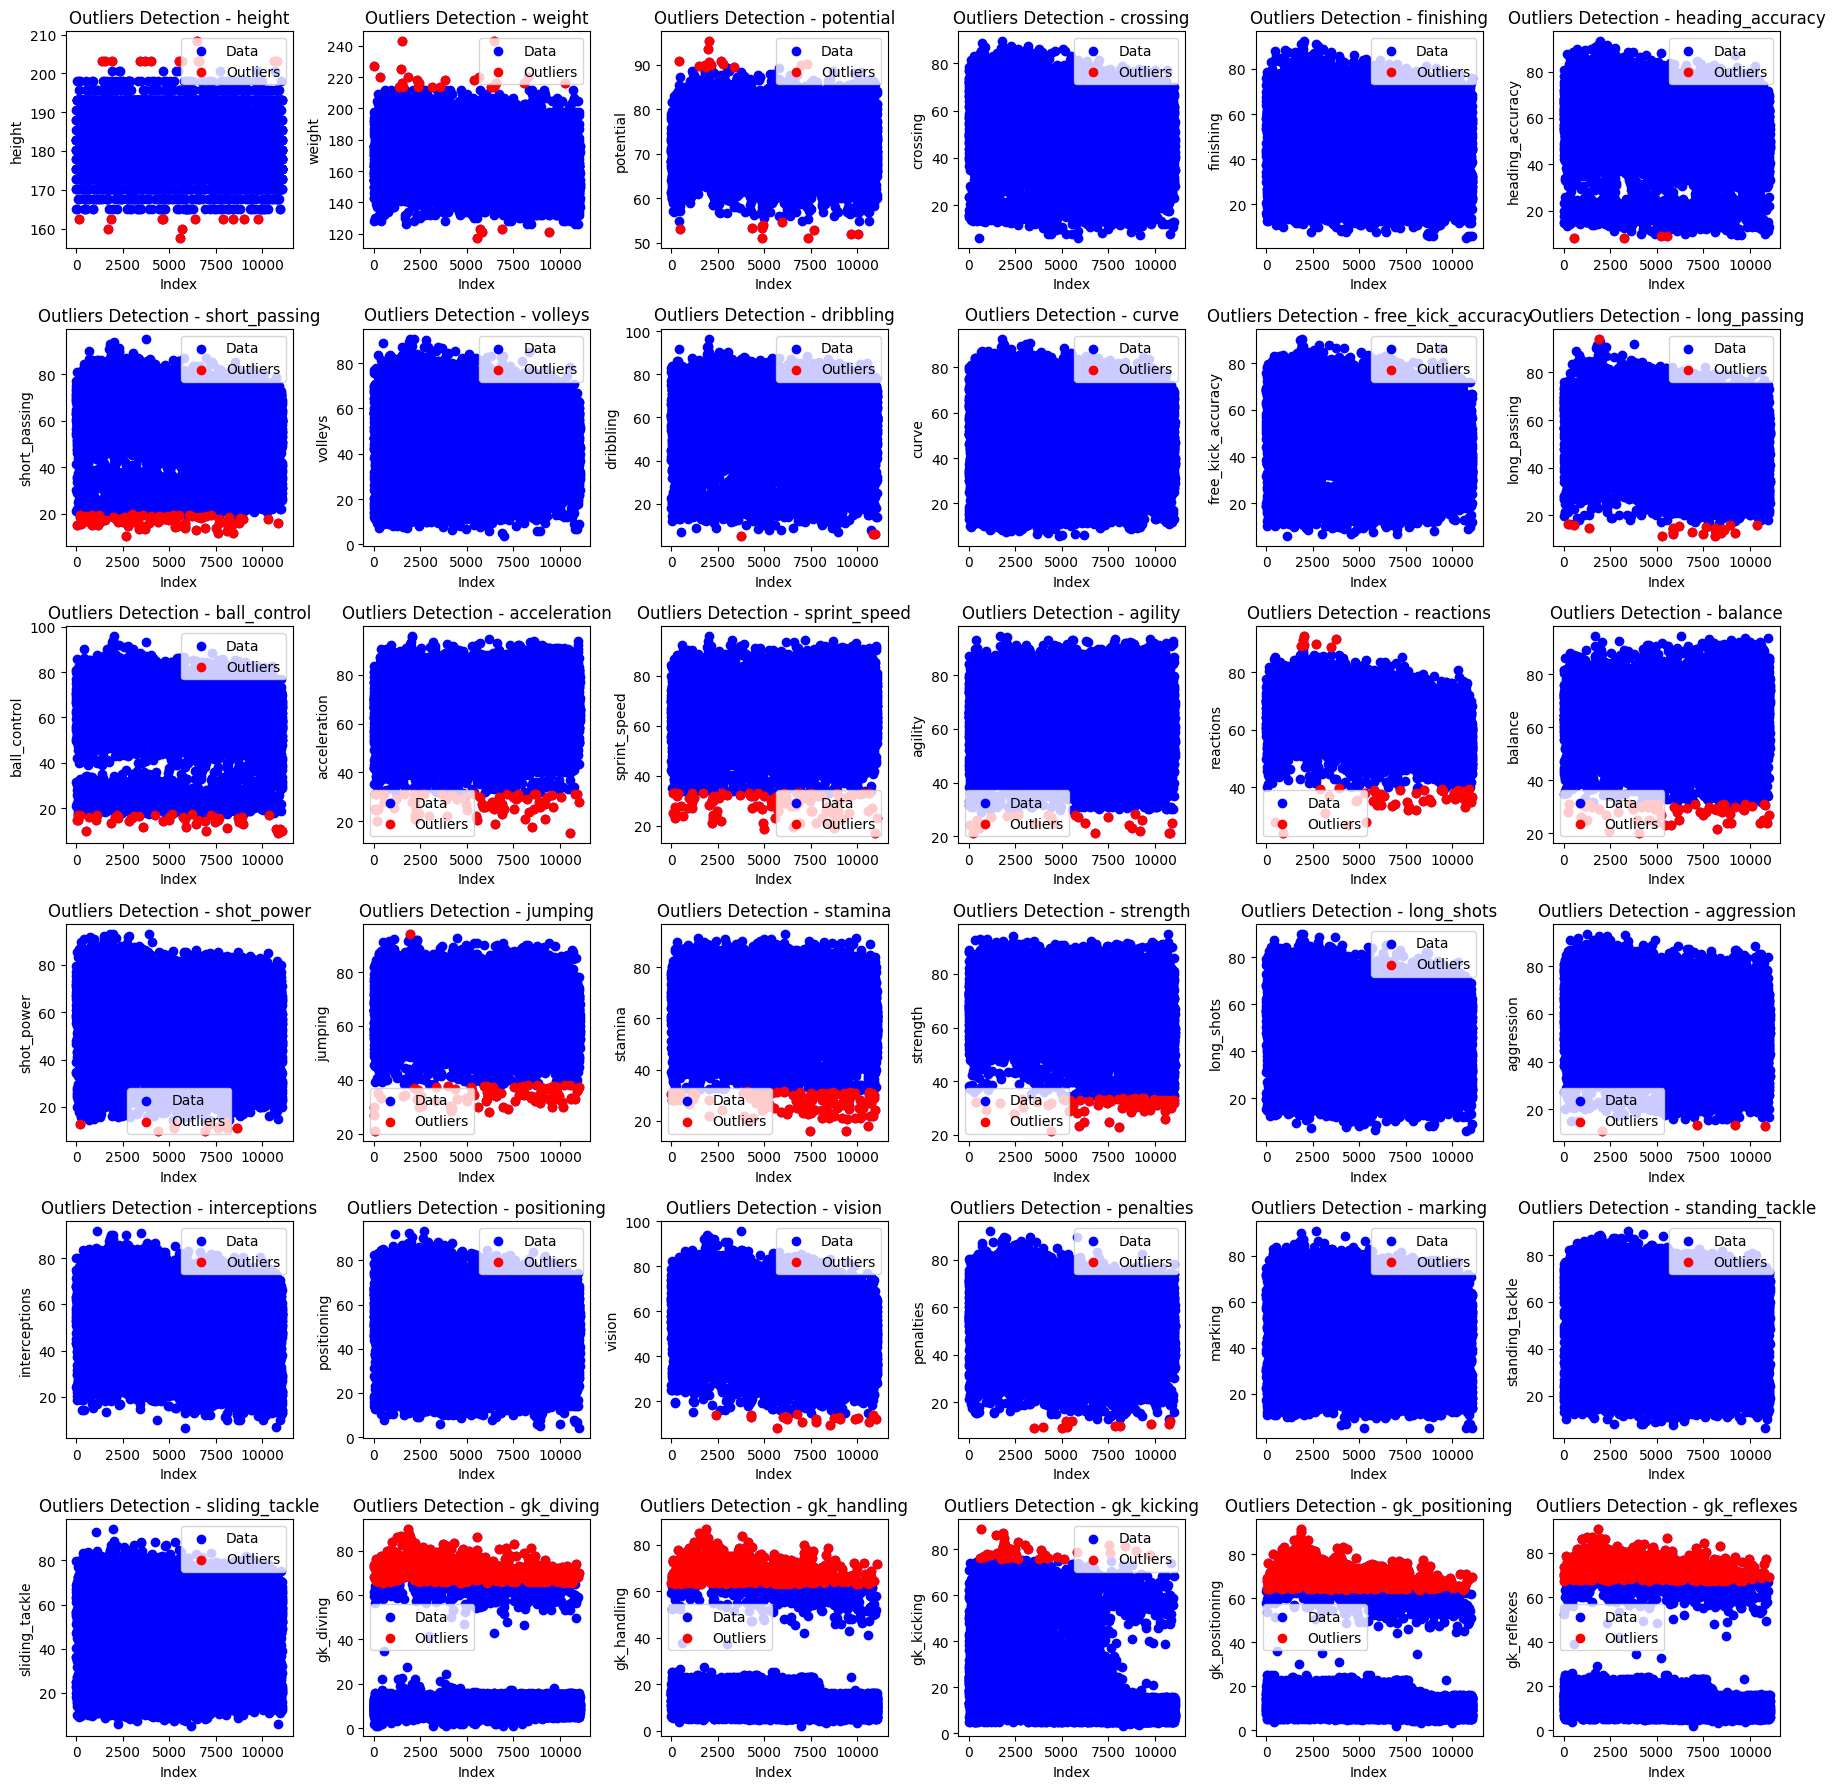

In [ ]:
def handle_outliers(df):
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        # Find outliers using z-score
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        threshold = 3  # Set the z-score threshold for outlier detection
        outliers = df[np.abs(z_scores) > threshold]

        # Visualize the outliers
        axes[i].scatter(df.index, df[column], color='blue', label='Data')
        axes[i].scatter(outliers.index, outliers[column], color='red', label='Outliers')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(column)
        axes[i].set_title(f'Outliers Detection - {column}')
        axes[i].legend()

        # Handle outliers by replacing them with the median value
        median_value = df[column].median()
        df.loc[np.abs(z_scores) > threshold, column] = median_value

    plt.tight_layout()
    plt.show()

handle_outliers(X)

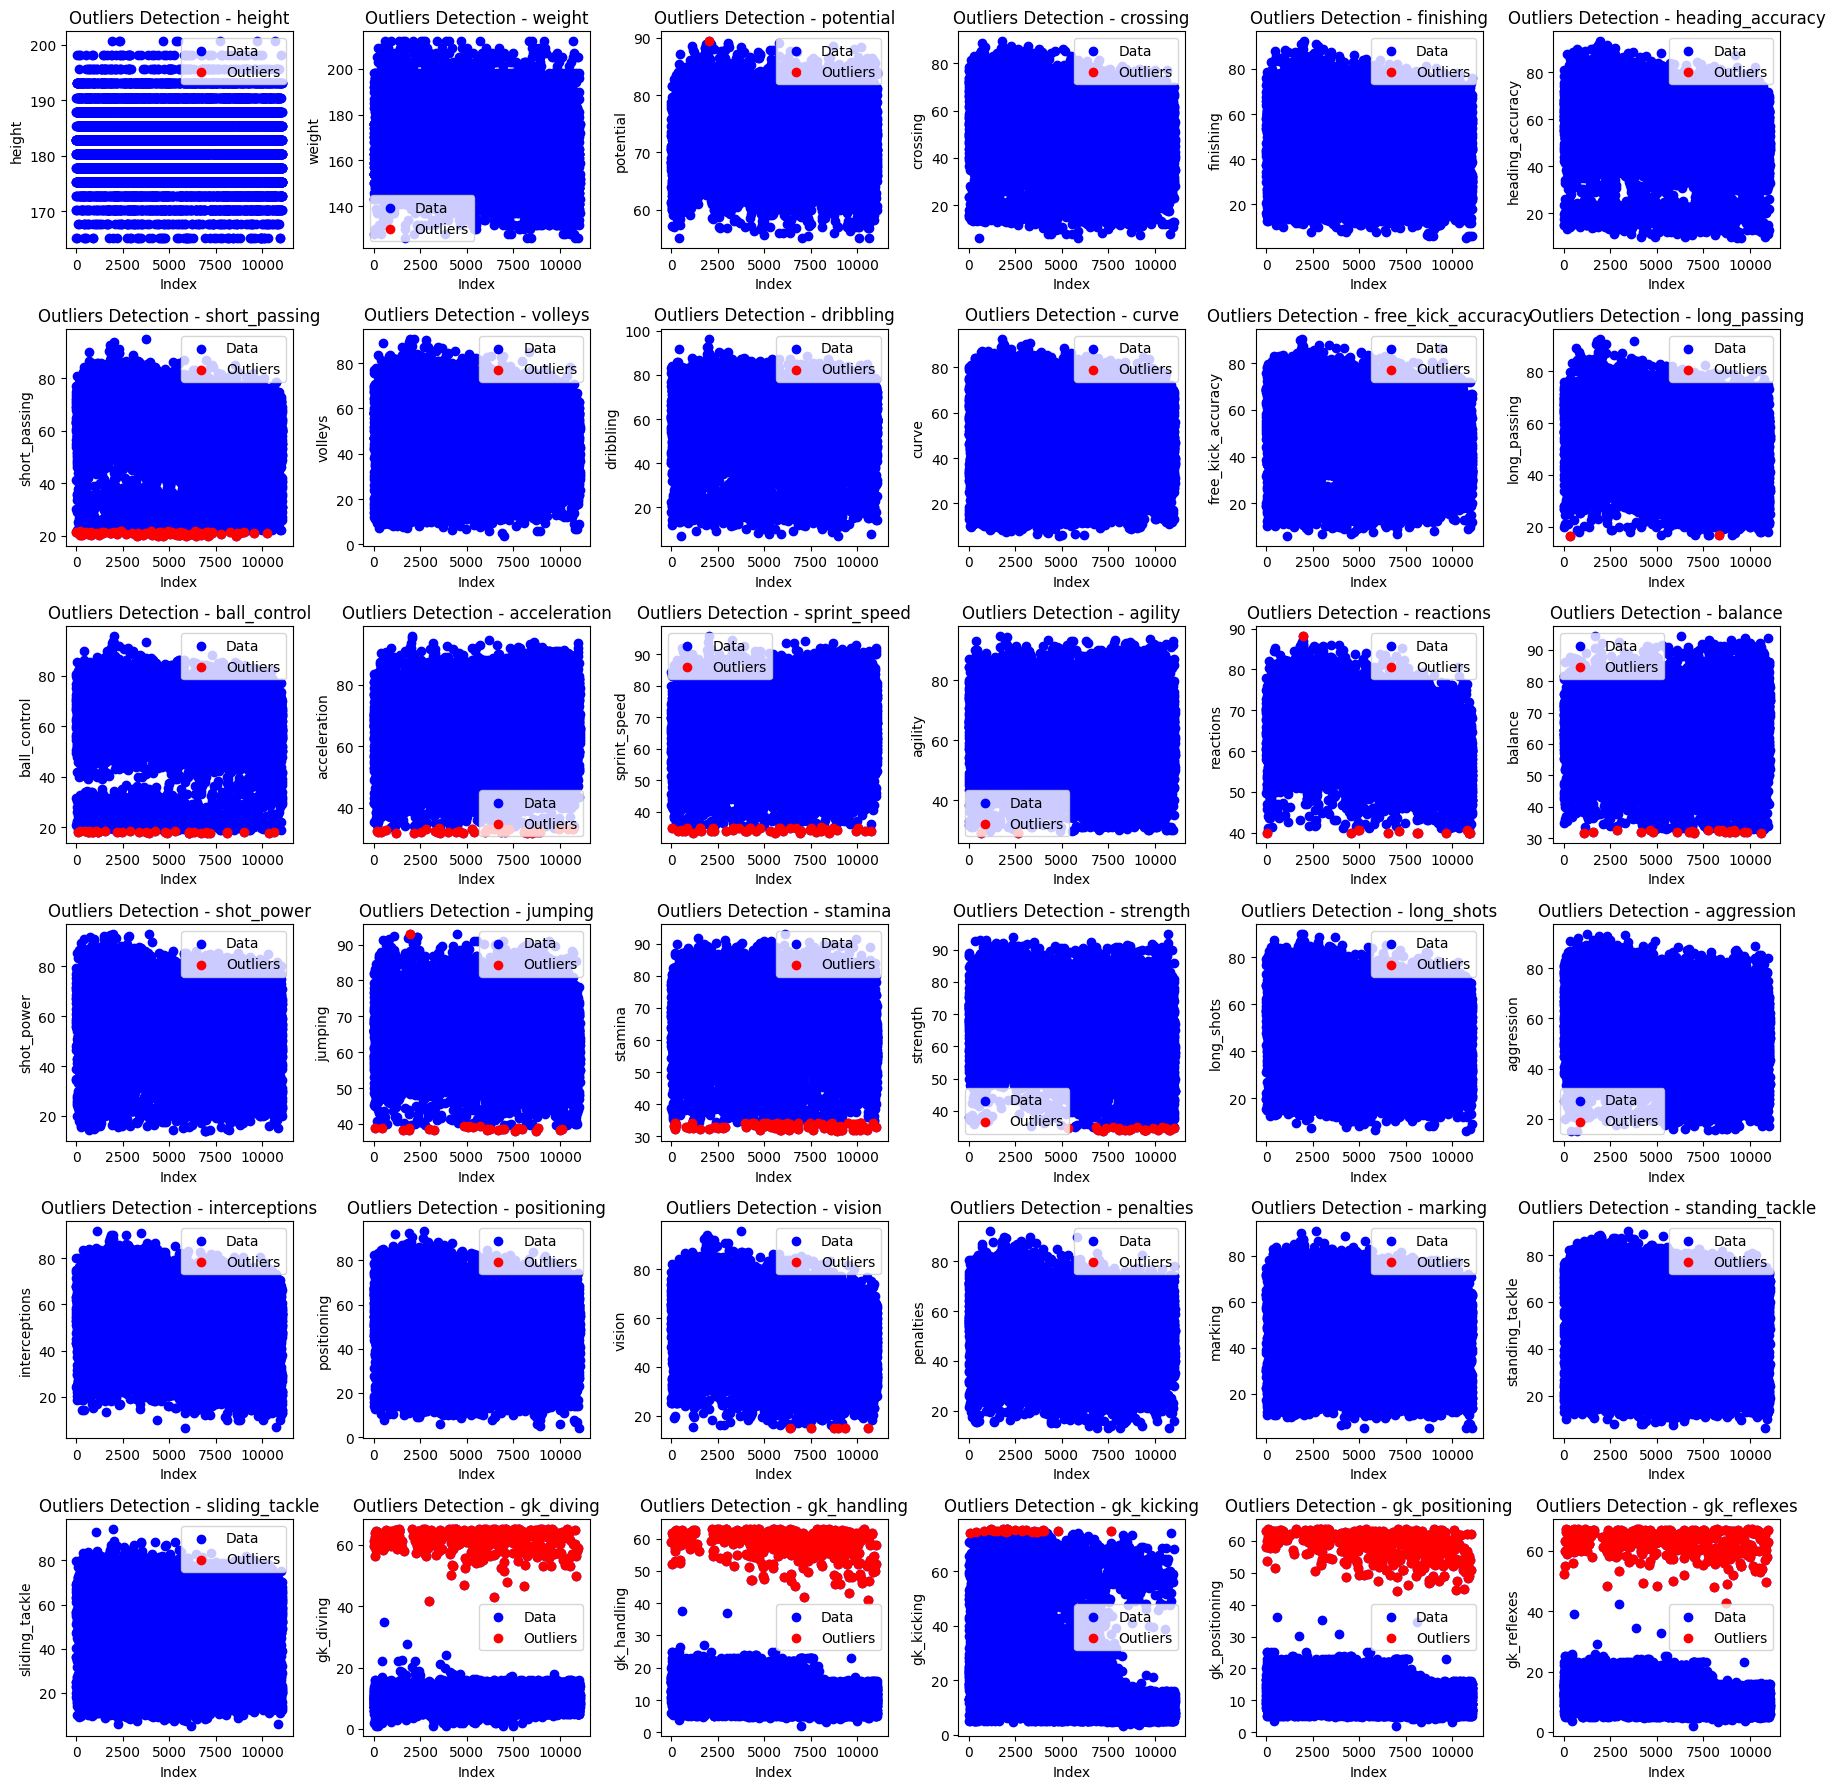

In [ ]:
# let's check again if outliers are present
def visualize_outliers(df):
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        # Find outliers using z-score
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        threshold = 3  # Set the z-score threshold for outlier detection
        outliers = df[np.abs(z_scores) > threshold]

        # Visualize the outliers
        axes[i].scatter(df.index, df[column], color='blue', label='Data')
        axes[i].scatter(outliers.index, outliers[column], color='red', label='Outliers')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(column)
        axes[i].set_title(f'Outliers Detection - {column}')
        axes[i].legend()


    plt.tight_layout()
    plt.show()


visualize_outliers(X)

In [ ]:
# few columns still have the outliers
def handle_outliers(df):
    for column in df.columns:
        # Find outliers using z-score
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        threshold = 3  # Set the z-score threshold for outlier detection
        outliers = df[np.abs(z_scores) > threshold]

        # Handle outliers by replacing them with the median value
        if not outliers.empty:
            median_value = df[column].median()
            df.loc[np.abs(z_scores) > threshold, column] = median_value

handle_outliers(X)

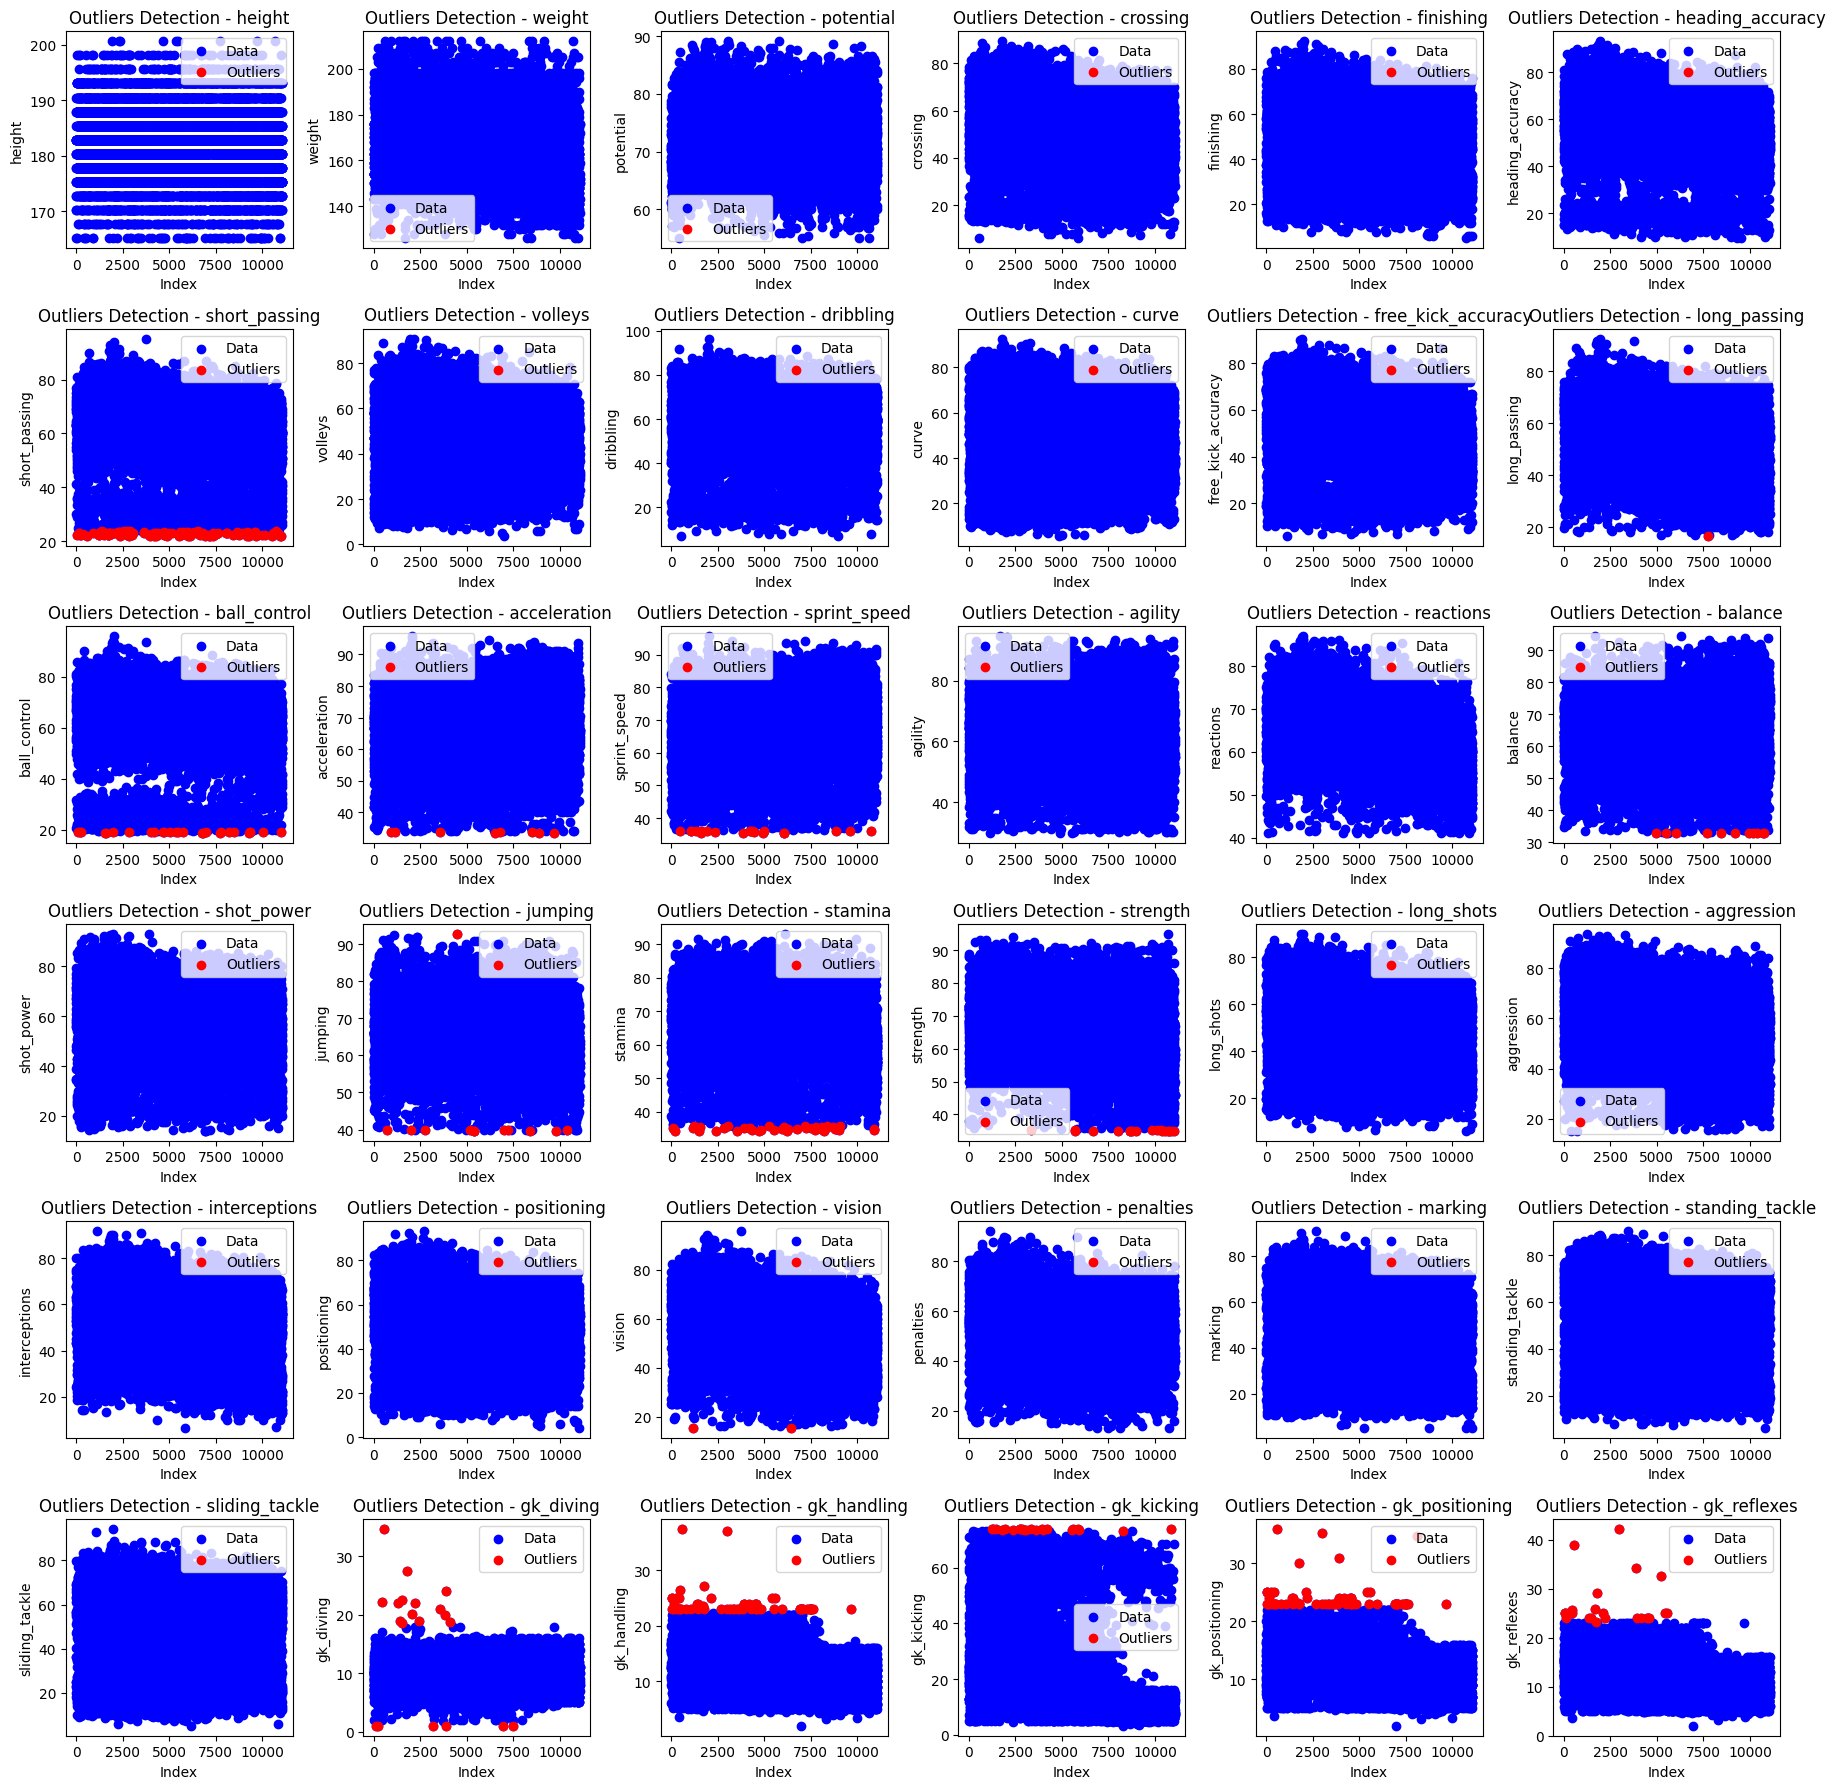

In [ ]:
visualize_outliers(X)

In [ ]:
handle_outliers(X) # removing again

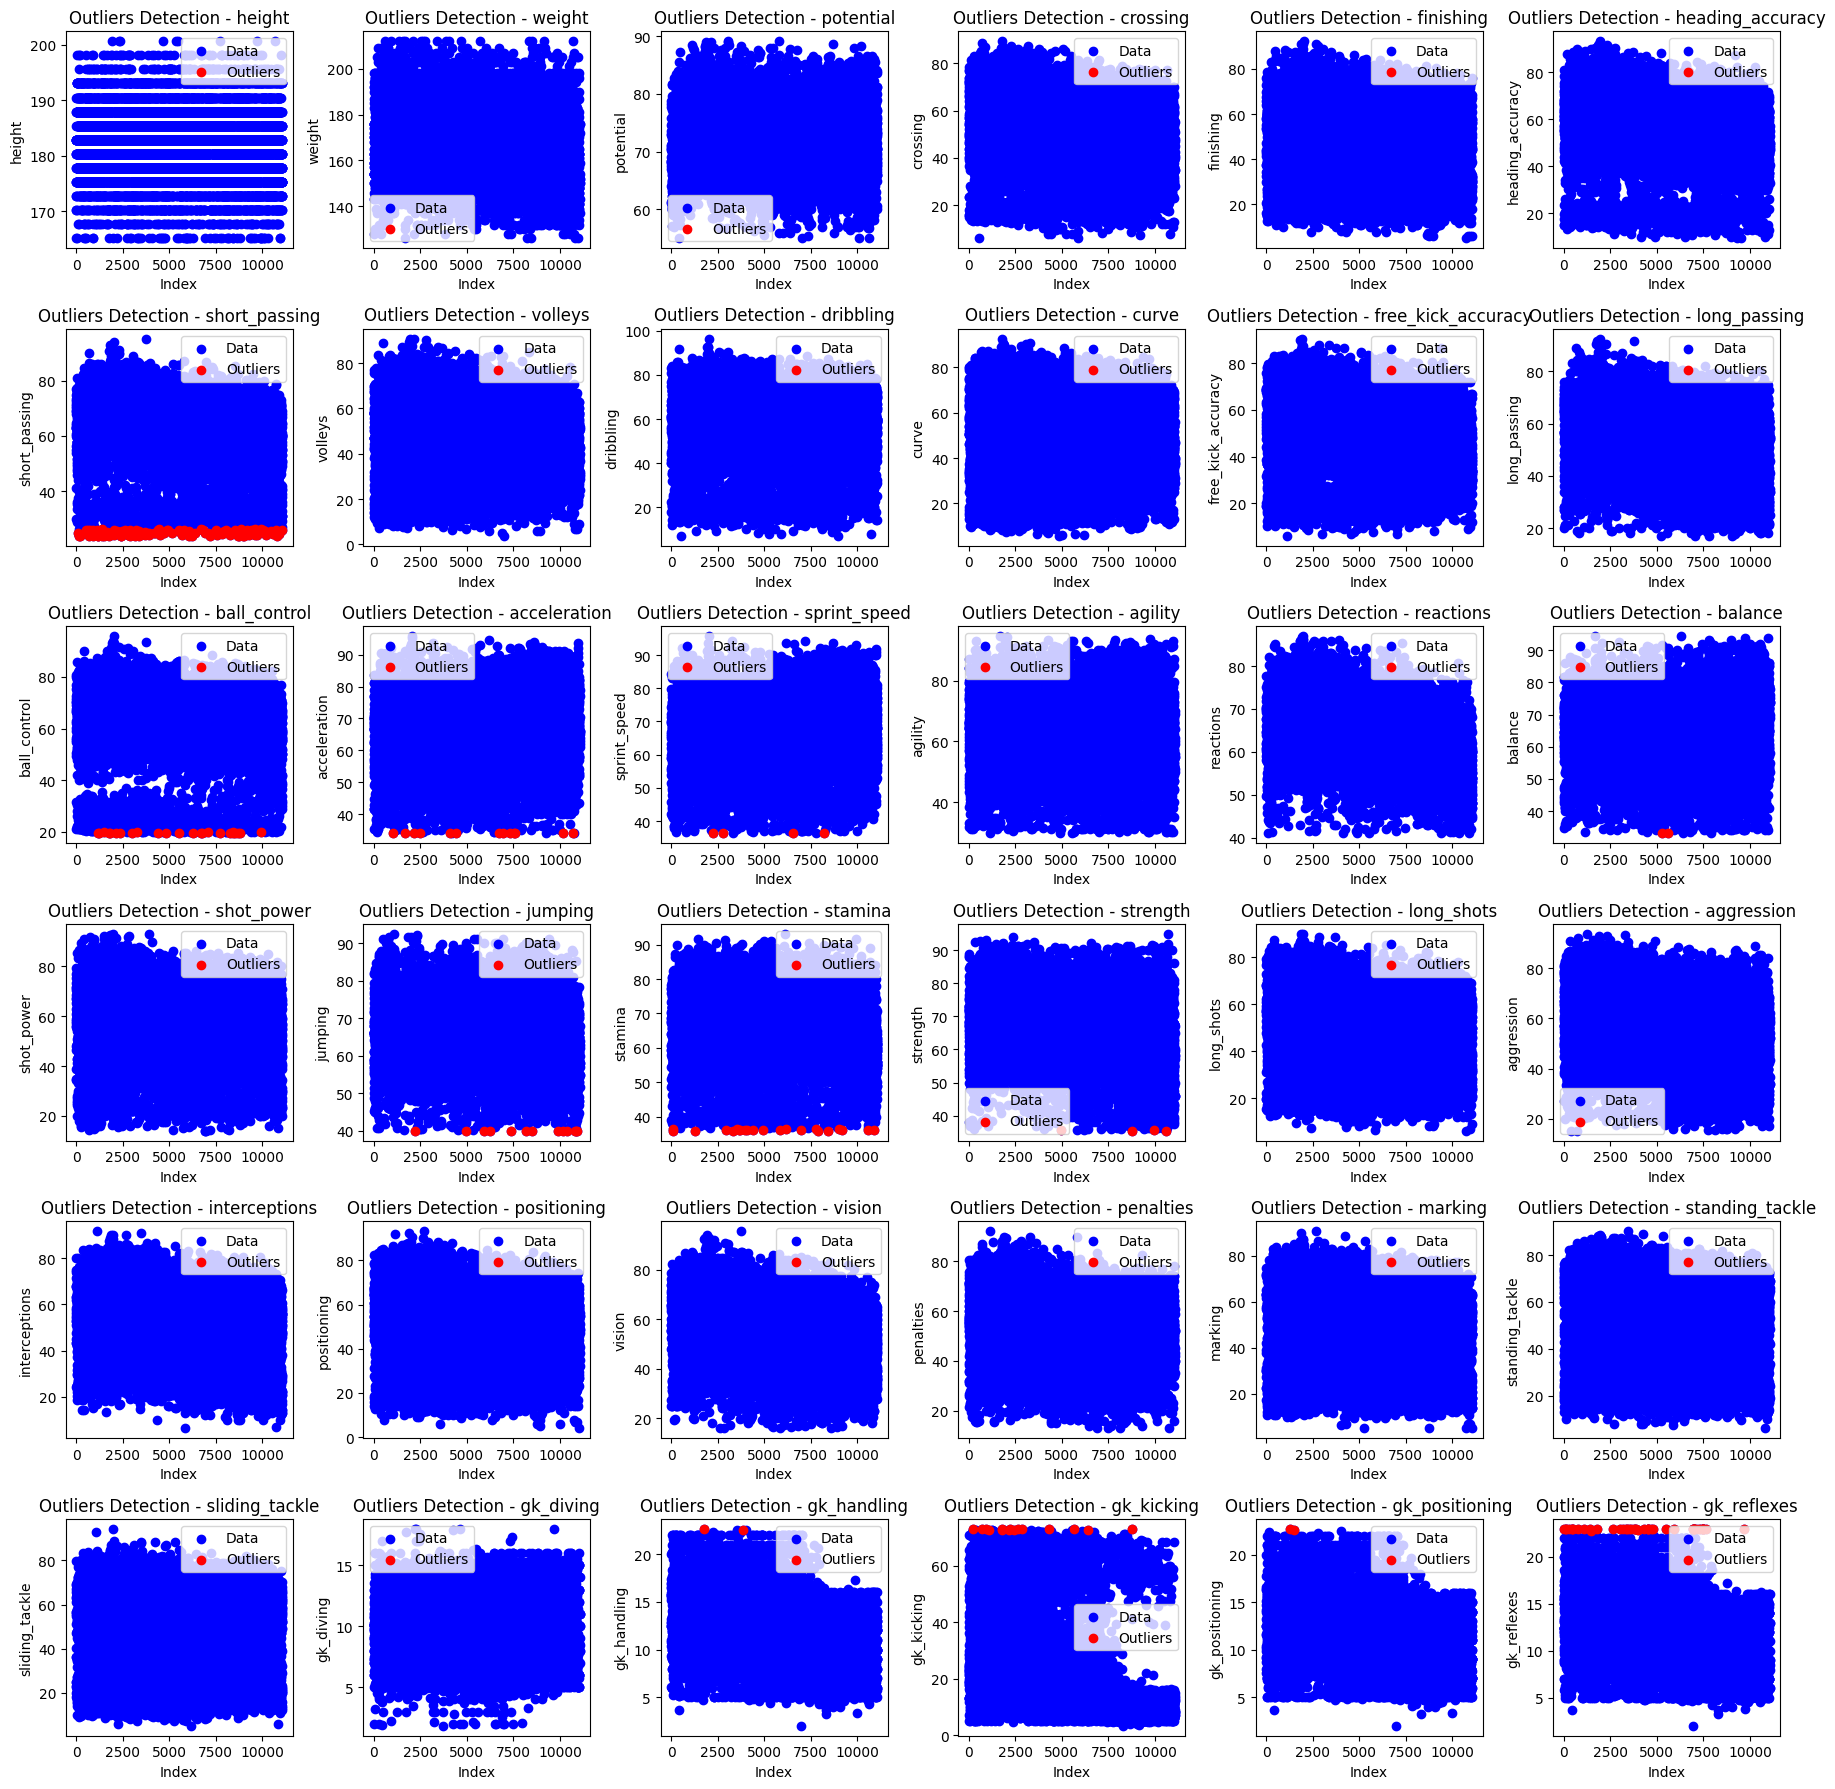

In [ ]:
visualize_outliers(X)

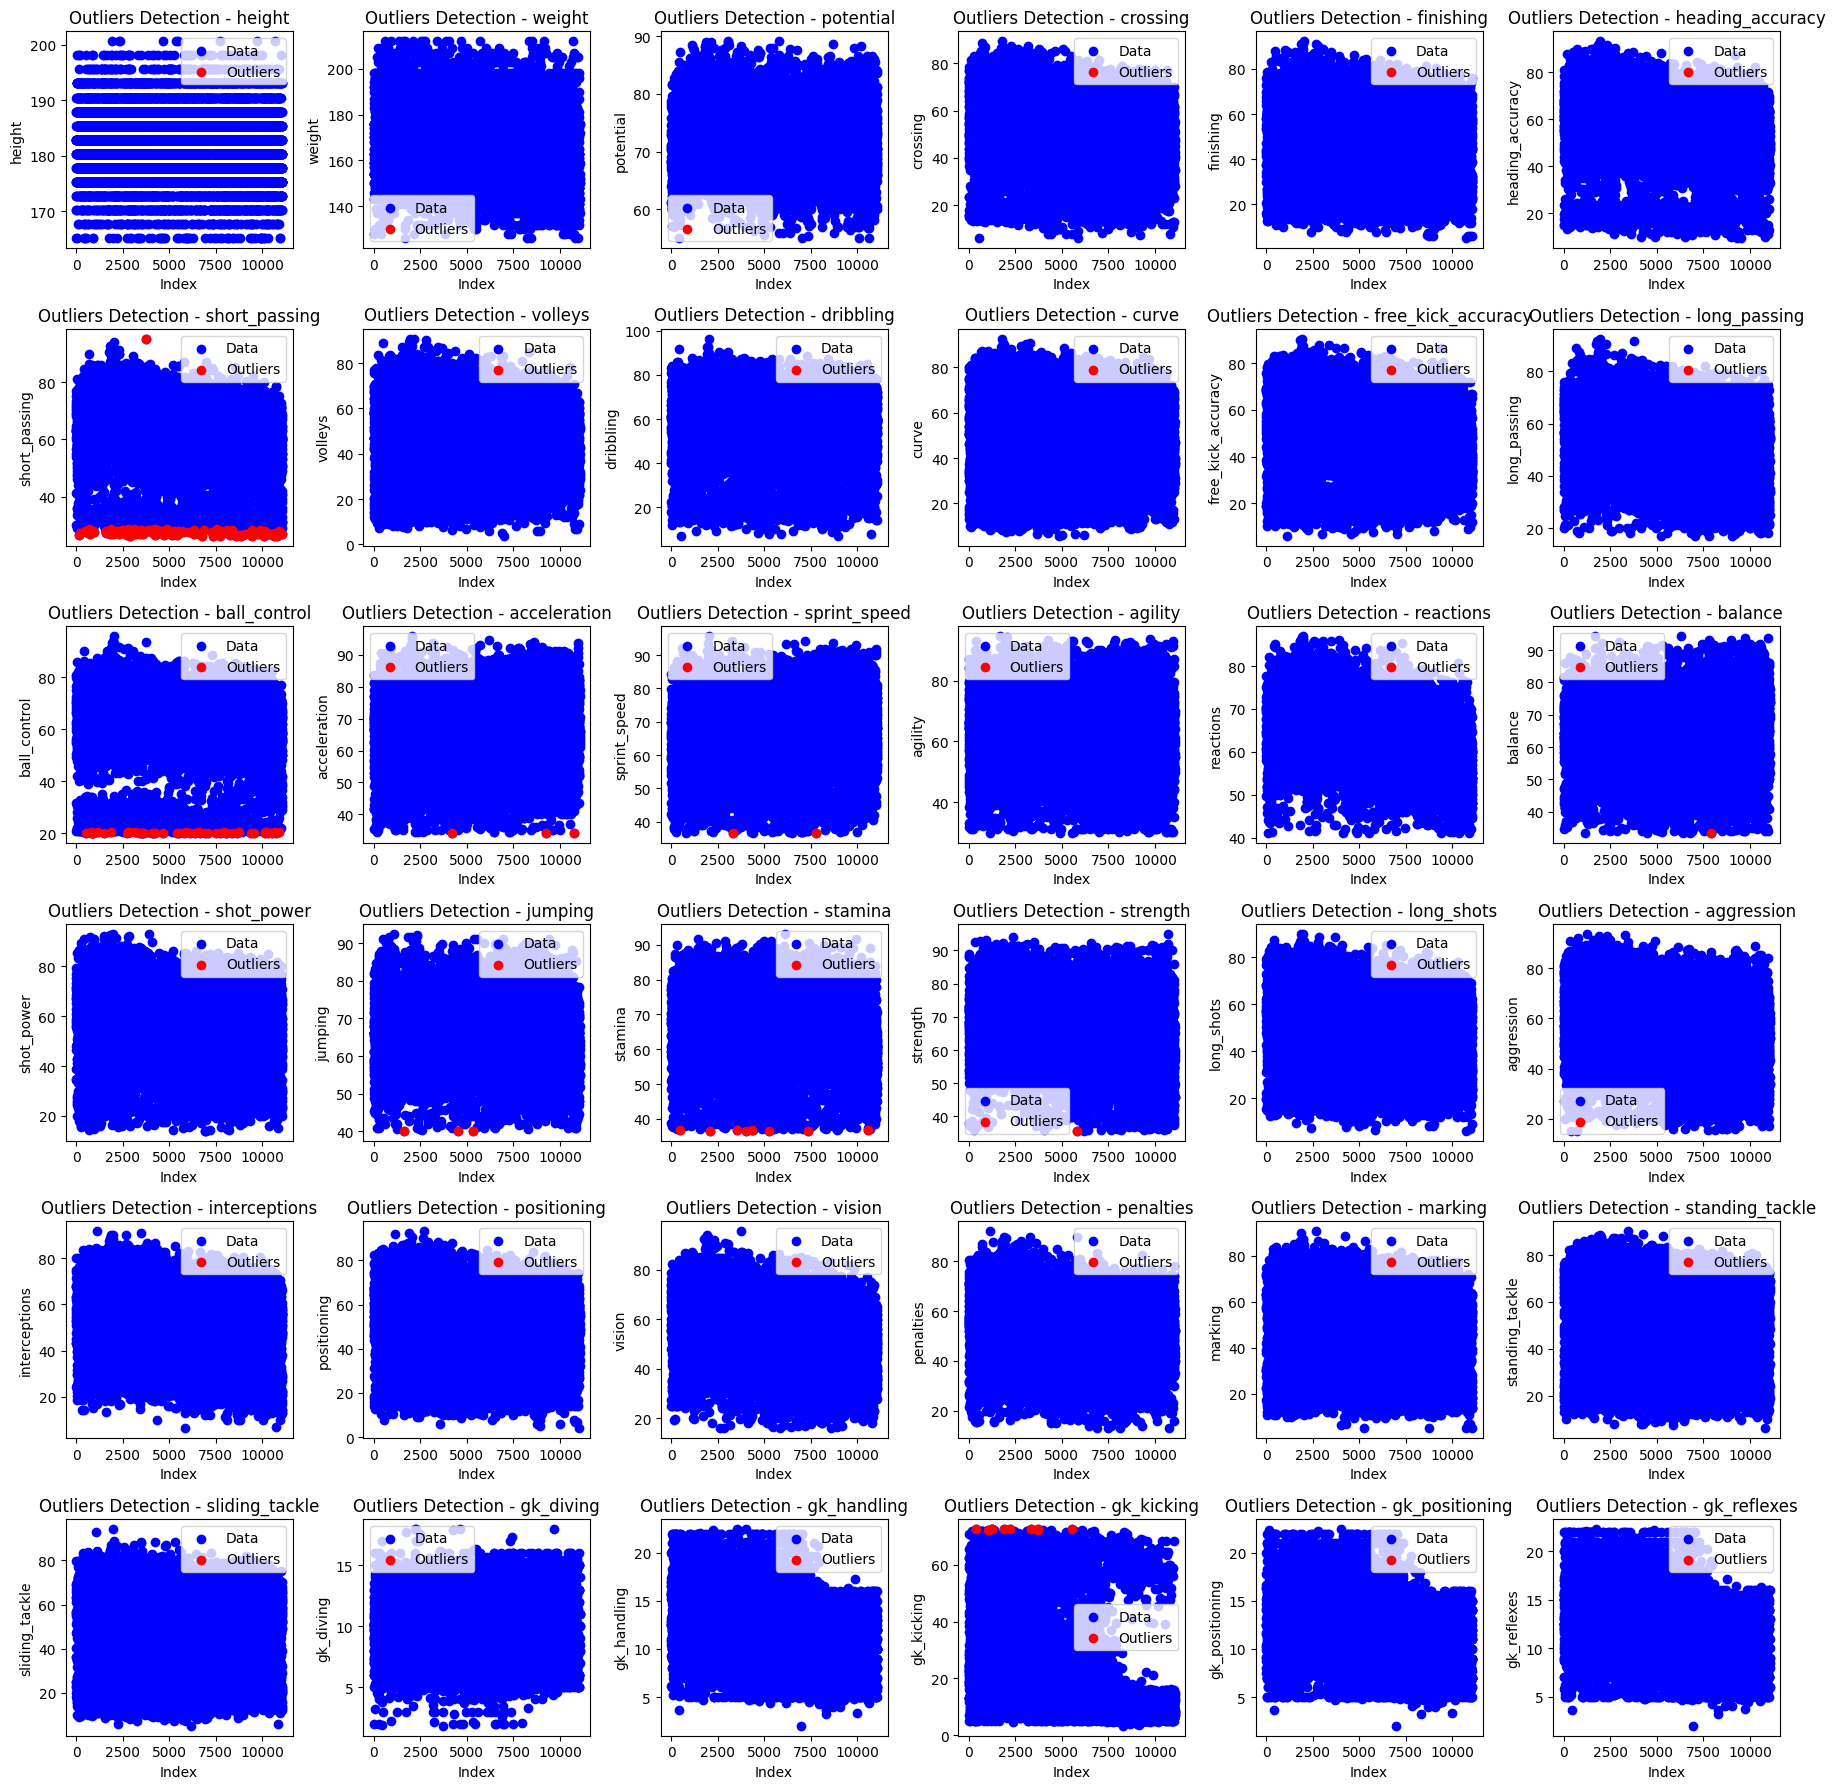

In [ ]:
handle_outliers(X) # removing again
visualize_outliers(X) # visualizing again

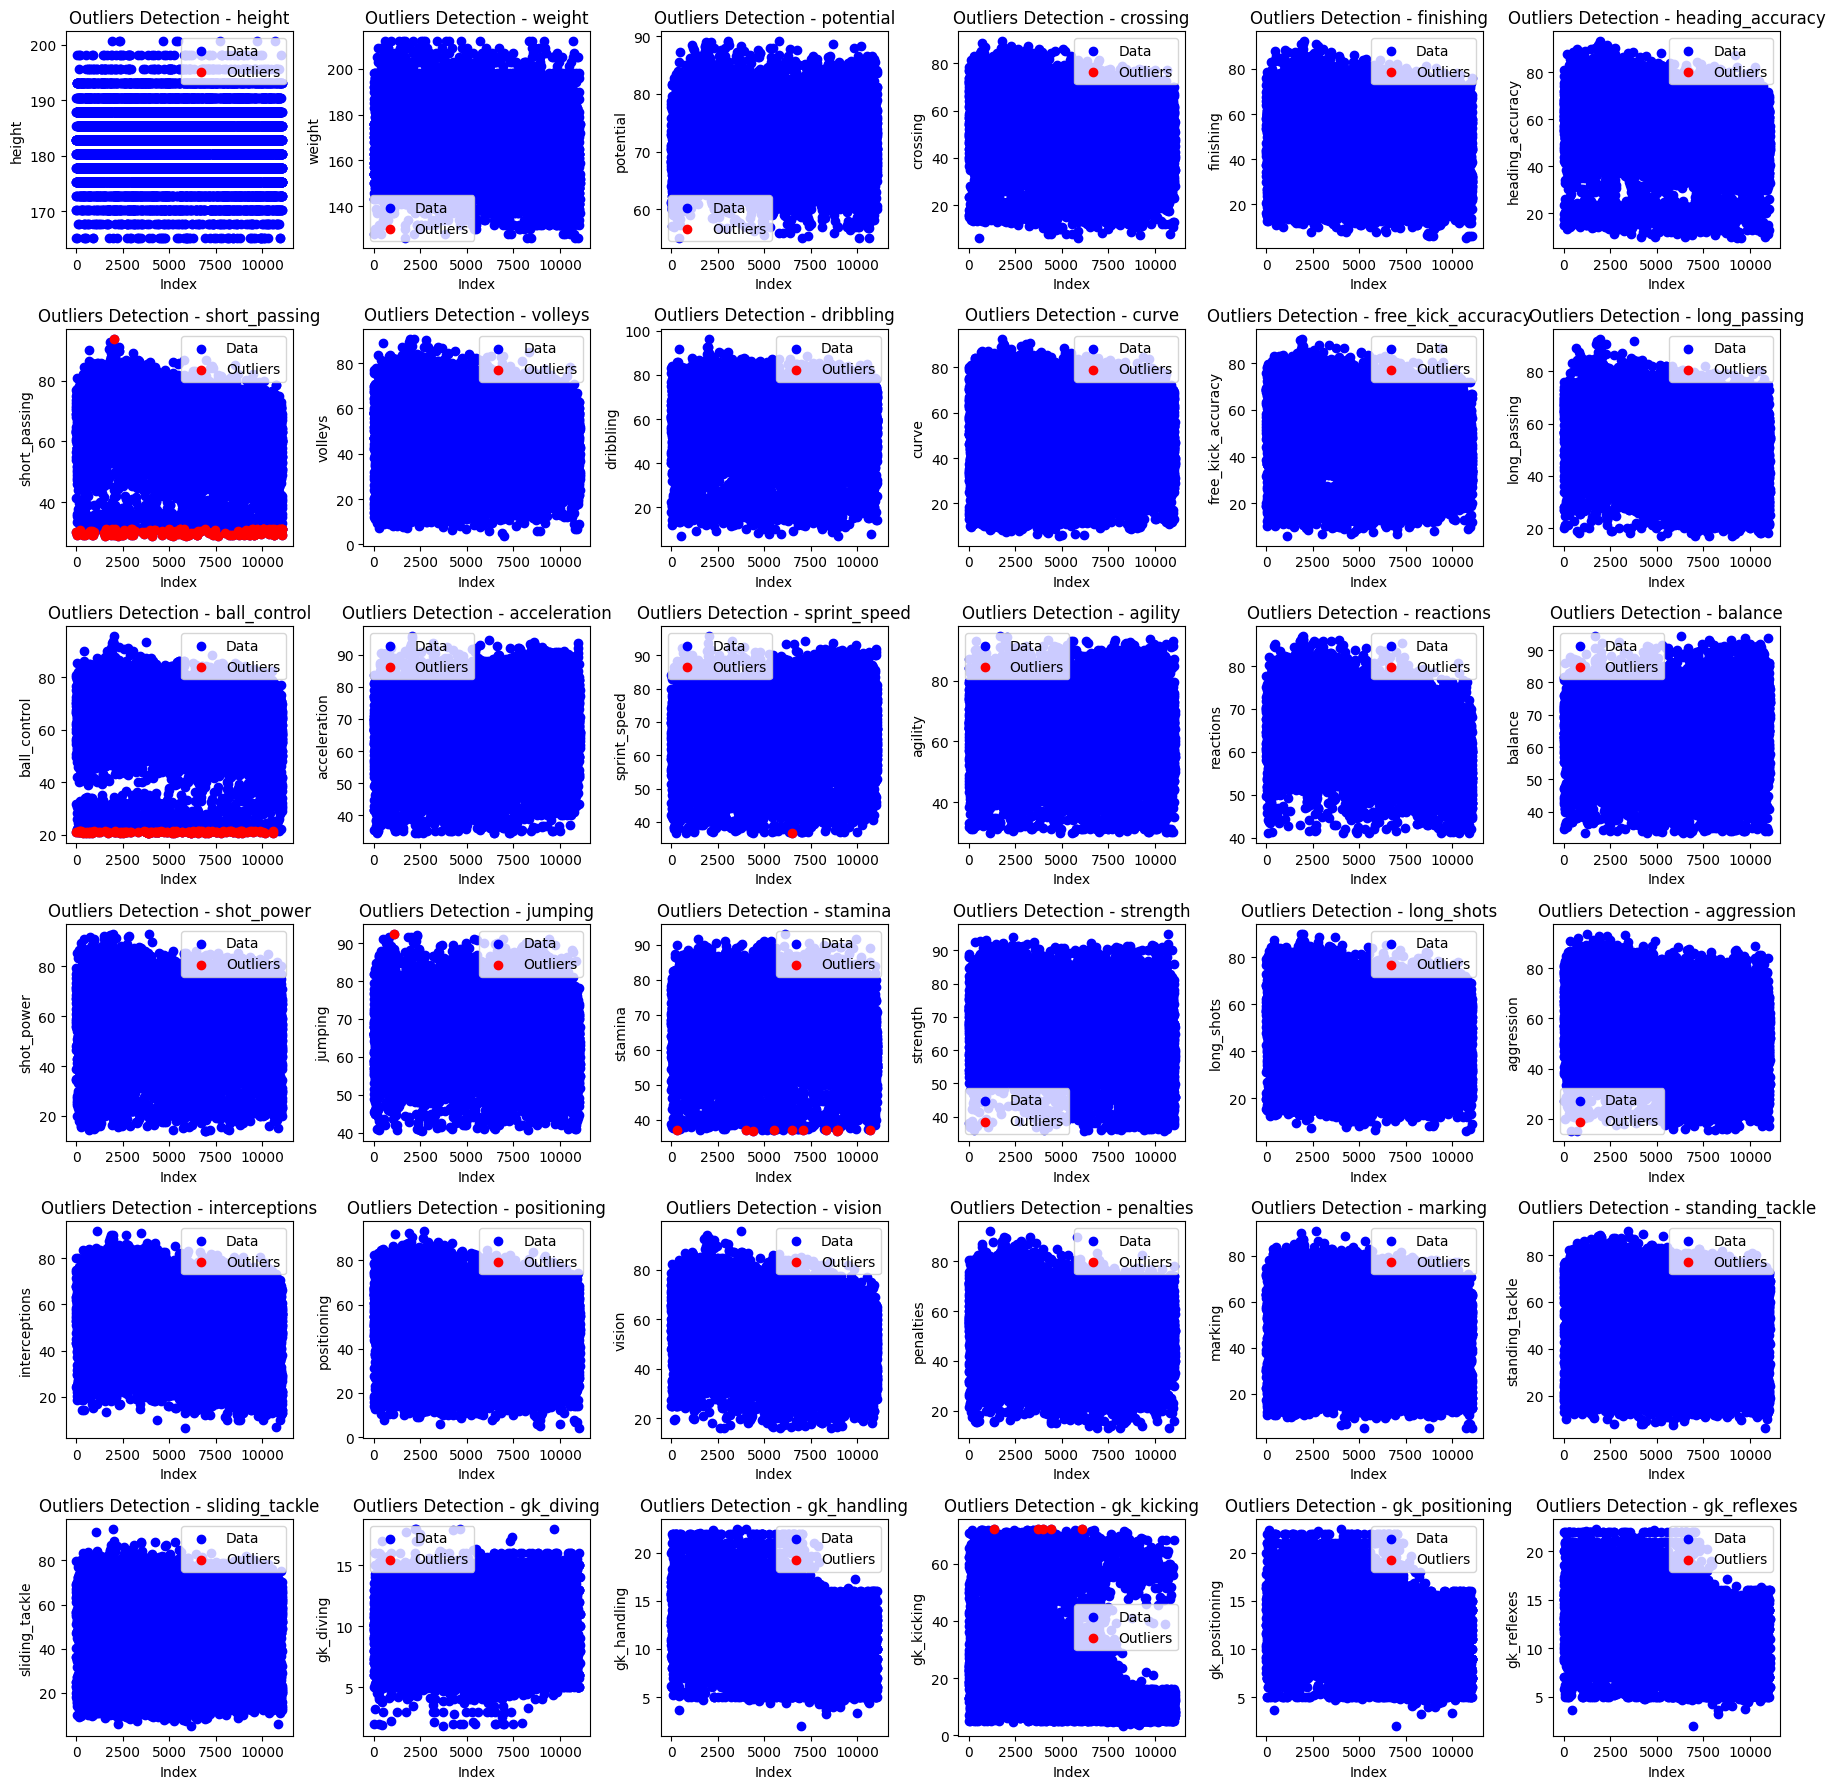

In [ ]:
handle_outliers(X) # removing again
visualize_outliers(X) # visualizing again

# 95% + outliers have been removed sucessfully .

In [ ]:
# let's check for the duplicates value
duplicate_rows = X[X.duplicated()]

In [ ]:
duplicate_rows

Empty DataFrame
Columns: [height, weight, potential, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes]
Index: []

[0 rows x 36 columns]

# we don't have any duplicate row present we are good here


In [ ]:
X

height  weight  potential   crossing  finishing  heading_accuracy  \
0      175.26   154.0  61.142857  50.142857  47.285714         46.285714   
1      187.96   174.0  70.380952  36.428571  37.428571         75.333333   
2      180.34   154.0  70.571429  42.238095  42.761905         66.666667   
3      180.34   161.0  73.533333  61.866667  67.666667         67.800000   
4      175.26   163.0  75.800000  70.000000  37.400000         55.200000   
...       ...     ...        ...        ...        ...               ...   
11055  172.72   137.0  65.909091  42.454545  44.454545         47.454545   
11056  175.26   152.0  66.000000  55.000000  28.000000         50.000000   
11057  187.96   176.0  68.000000  48.000000  26.000000         57.000000   
11058  172.72   150.0  70.444444  35.000000  57.000000         55.000000   
11059  175.26   150.0  66.000000  47.000000  39.000000         53.000000   

       short_passing    volleys  dribbling      curve  ...     vision  \
0          56.500000  38.000000  54.142857  50.000000  ...  55.285714   
1          54.809524  20.428571  44.857143  30.428571  ...  52.428571   
2          64.714286  28.761905  40.238095  51.761905  ...  57.761905   
3          72.533333  67.133333  75.066667  79.800000  ...  71.600000   
4          68.000000  43.000000  60.800000  67.000000  ...  60.000000   
...              ...        ...        ...        ...  ...        ...   
11055      59.454545  42.454545  56.454545  46.454545  ...  51.454545   
11056      35.000000  29.000000  67.000000  37.000000  ...  40.000000   
11057      49.000000  24.000000  41.000000  39.000000  ...  36.000000   
11058      60.000000  52.000000  58.555556  56.000000  ...  58.000000   
11059      60.000000  37.000000  54.000000  40.000000  ...  47.000000   

       penalties    marking  standing_tackle  sliding_tackle  gk_diving  \
0      61.928571  62.928571        63.857143       56.571429  12.428571   
1      35.428571  71.095238        70.666667       65.571429  11.095238   
2      31.904762  71.666667        70.619048       79.714286  10.761905   
3      63.933333  30.200000        37.533333       25.000000   8.666667   
4      55.400000  74.600000        74.600000       69.000000   8.000000   
...          ...        ...              ...             ...        ...   
11055  52.454545  39.454545        48.454545       49.454545   8.454545   
11056  43.000000  55.000000        69.000000       62.000000   7.000000   
11057  45.000000  63.000000        69.000000       68.000000   8.000000   
11058  61.000000  18.000000        19.000000       21.000000   9.000000   
11059  52.000000  56.000000        66.000000       62.000000   8.000000   

       gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        12.857143   19.071429       10.357143    10.428571  
1         6.095238    7.095238        9.095238    15.095238  
2        15.904762   22.714286       15.142857    12.095238  
3        15.666667   27.200000       16.333333    17.000000  
4        17.000000   59.000000       16.600000    17.400000  
...            ...         ...             ...          ...  
11055    13.454545   12.454545       11.454545     8.454545  
11056    10.000000    7.000000        9.000000     9.000000  
11057     8.000000   12.000000       12.000000     6.000000  
11058    10.000000    8.000000       10.000000    11.000000  
11059     9.000000   13.000000       11.000000    13.000000  

[11060 rows x 36 columns]

# let's check for the distribution of the data


<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


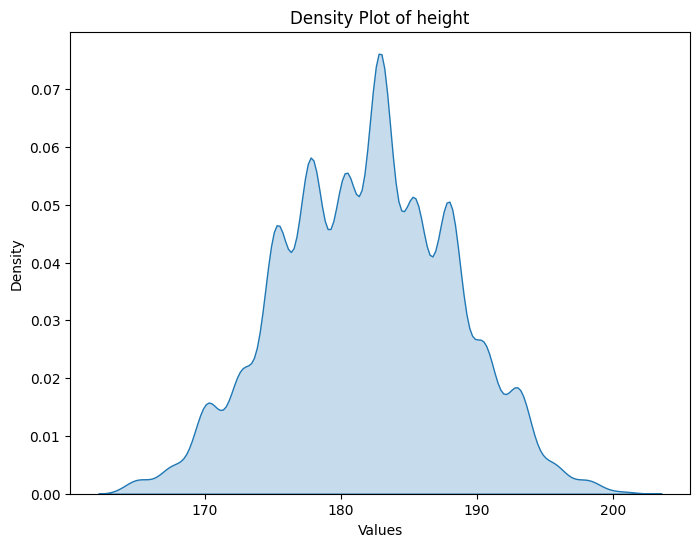

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


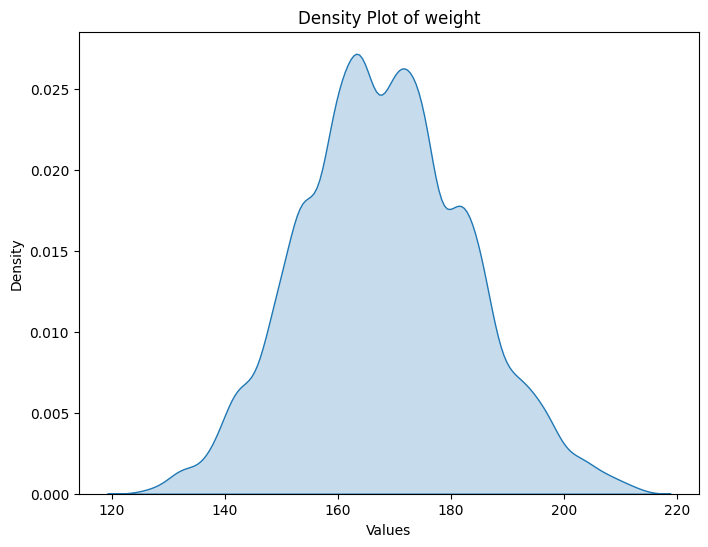

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


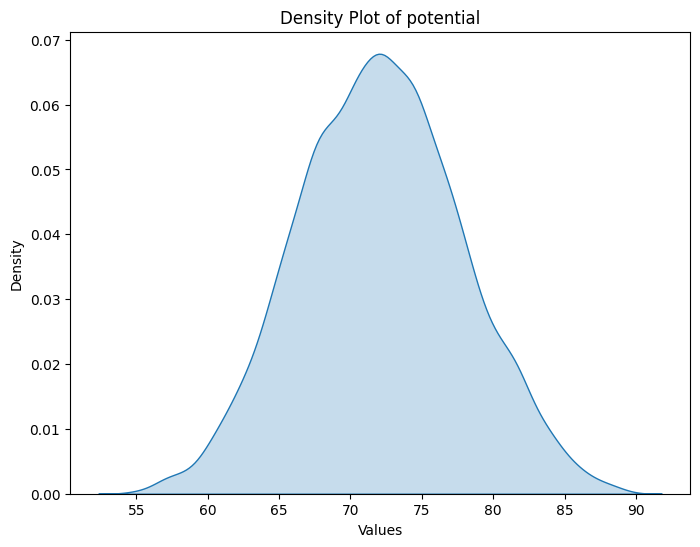

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


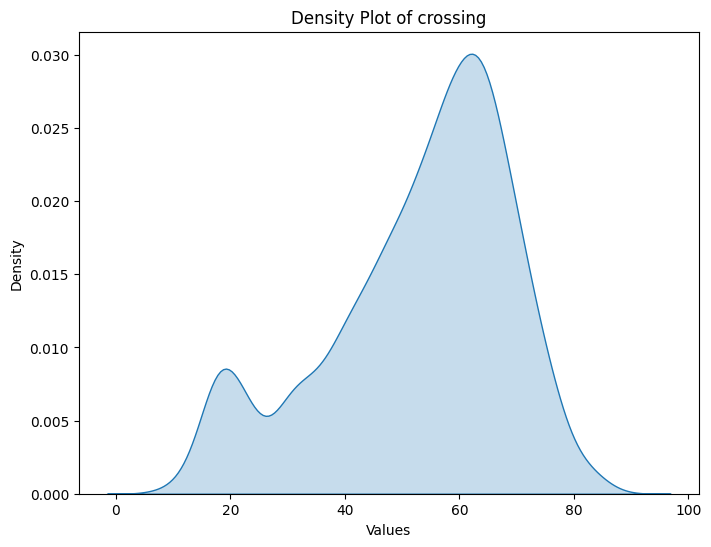

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


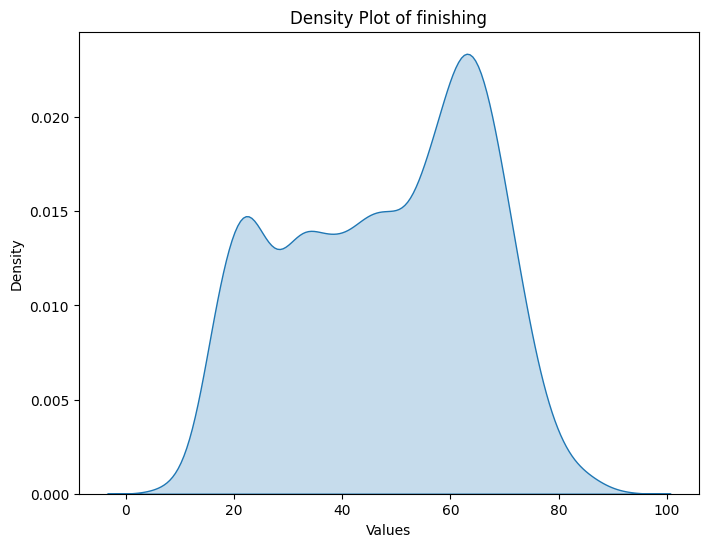

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


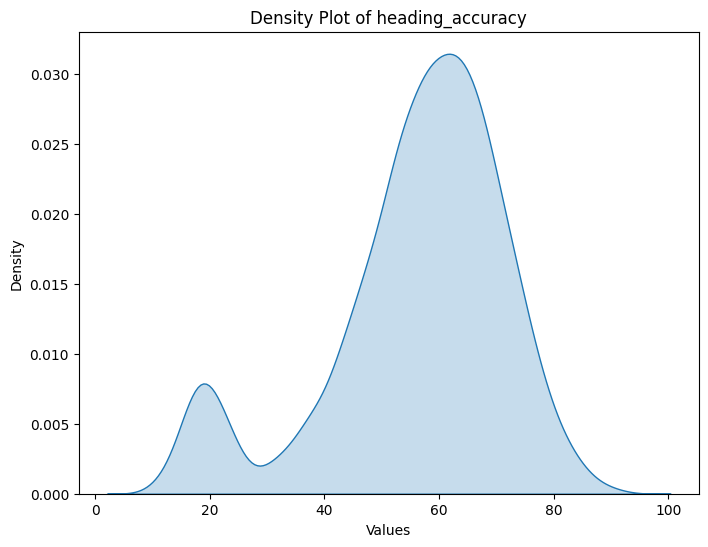

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


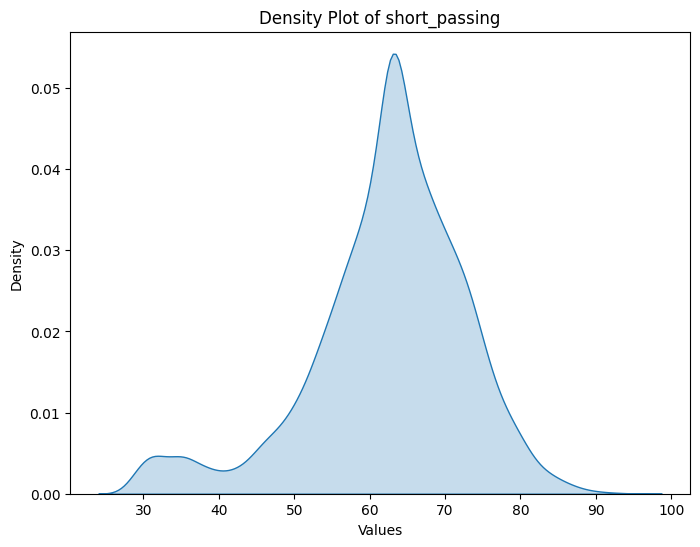

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


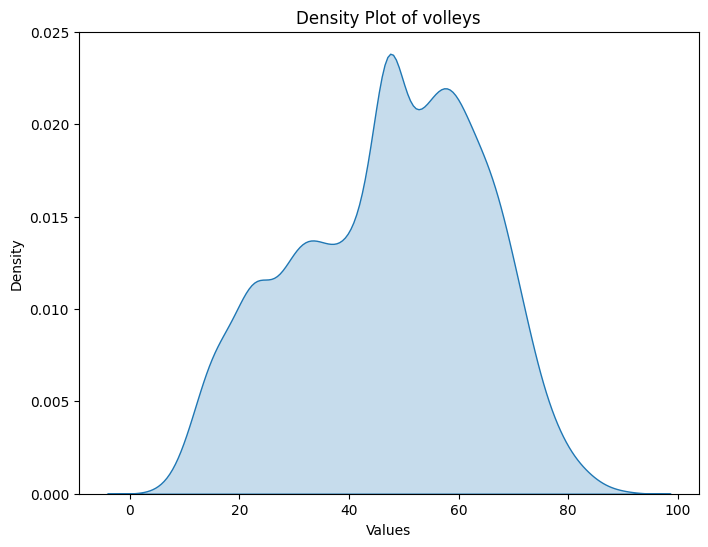

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


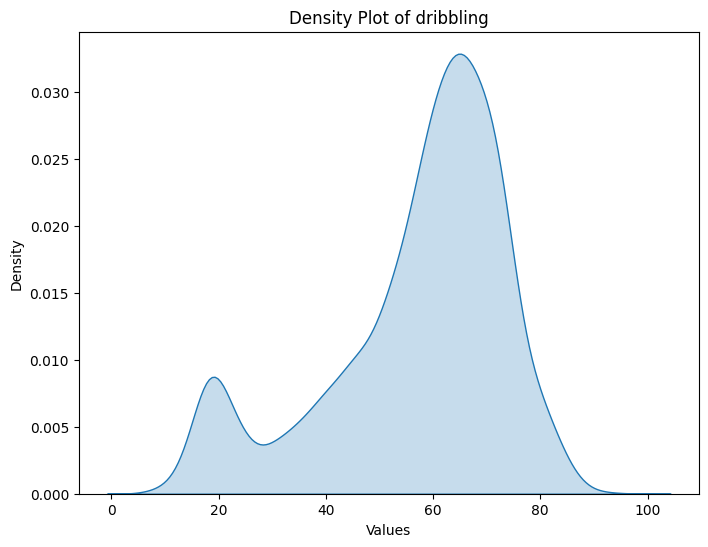

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


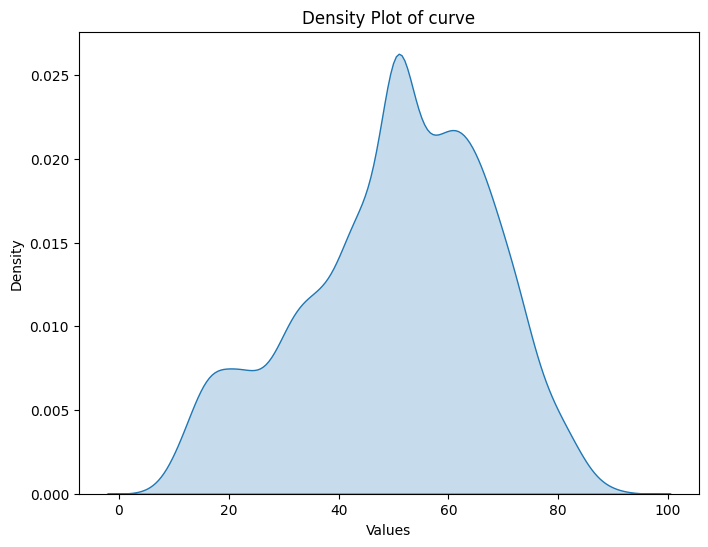

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


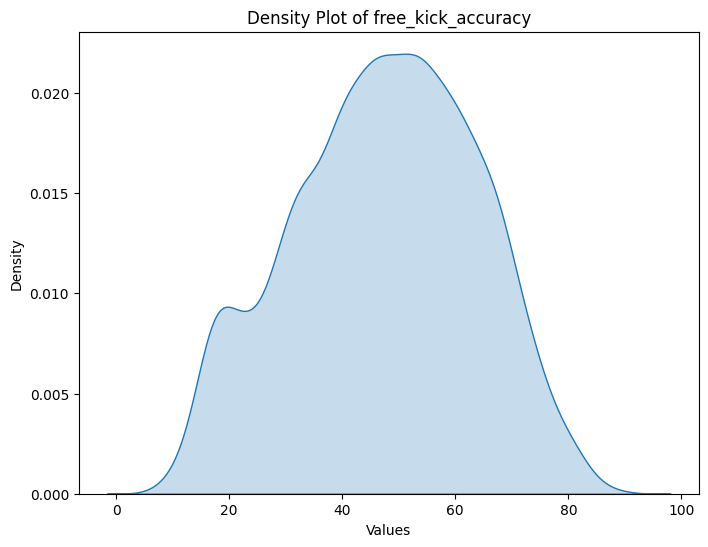

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


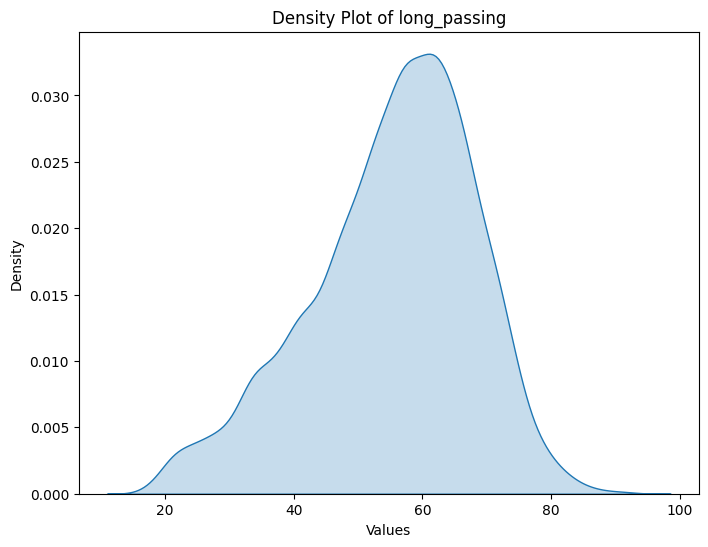

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


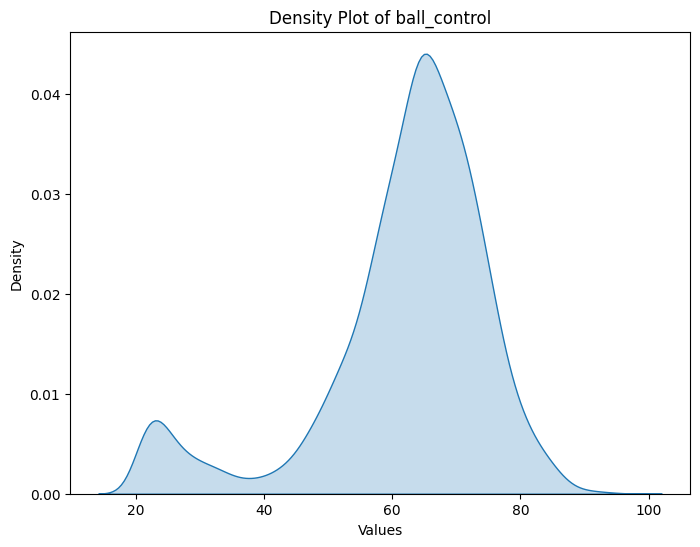

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


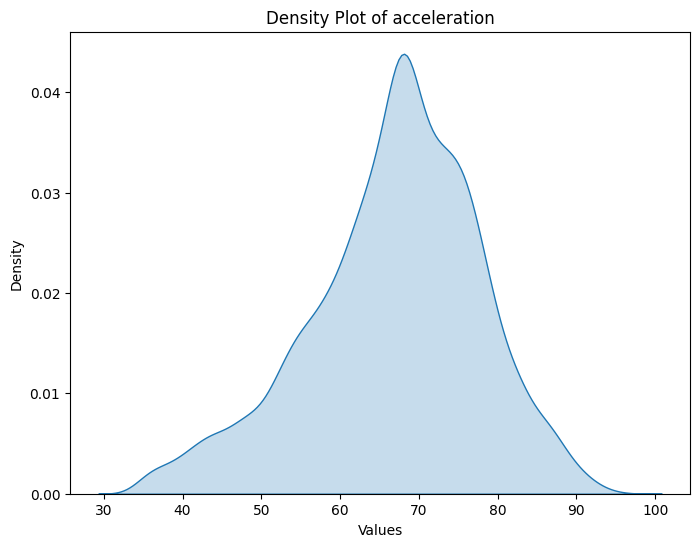

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


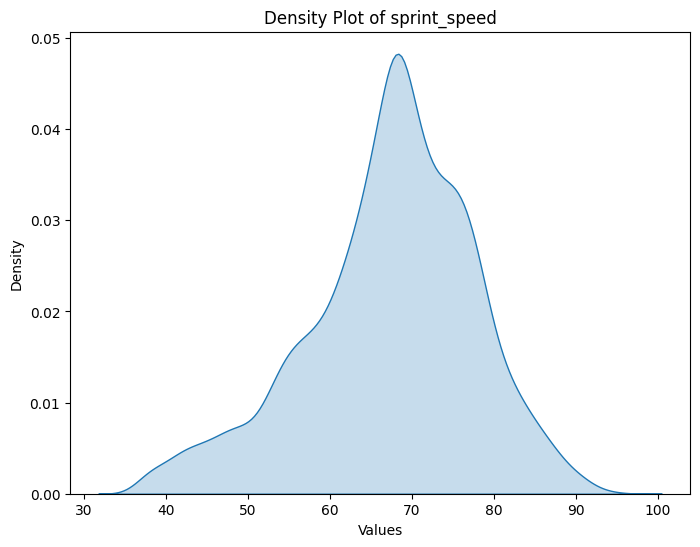

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


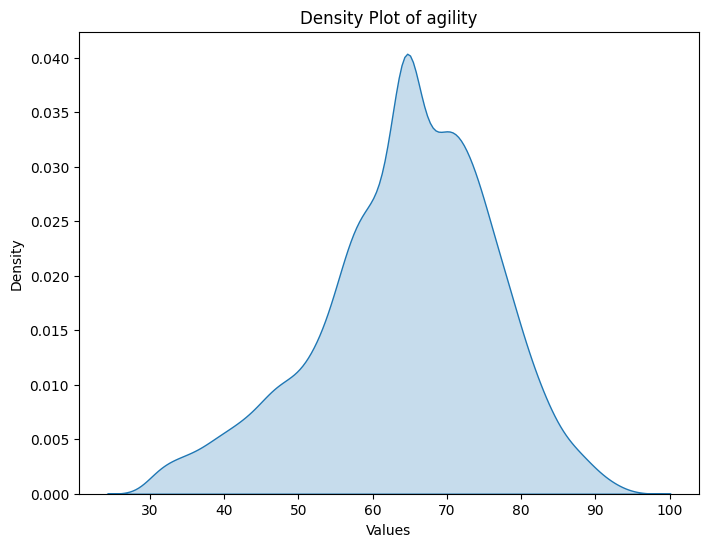

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


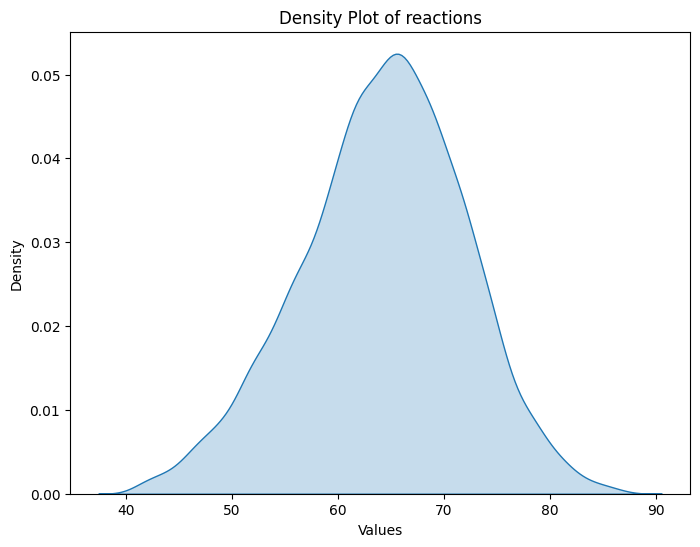

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


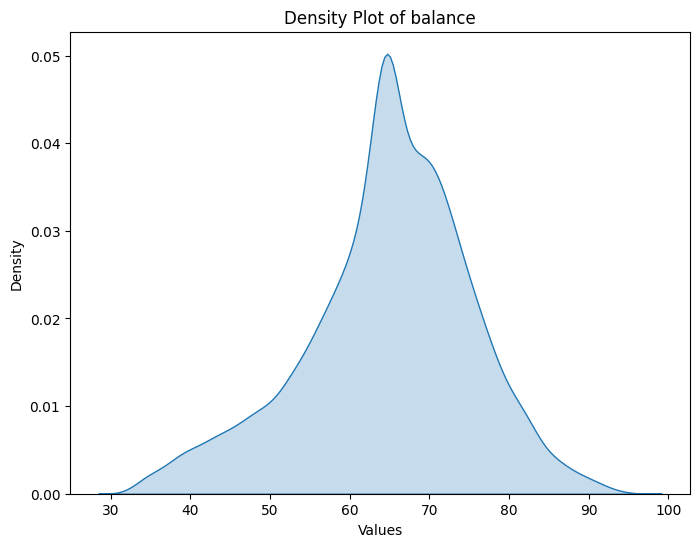

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


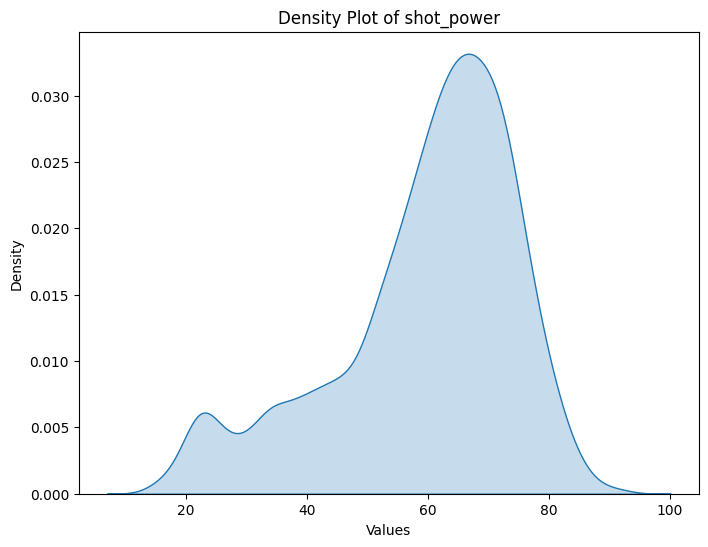

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


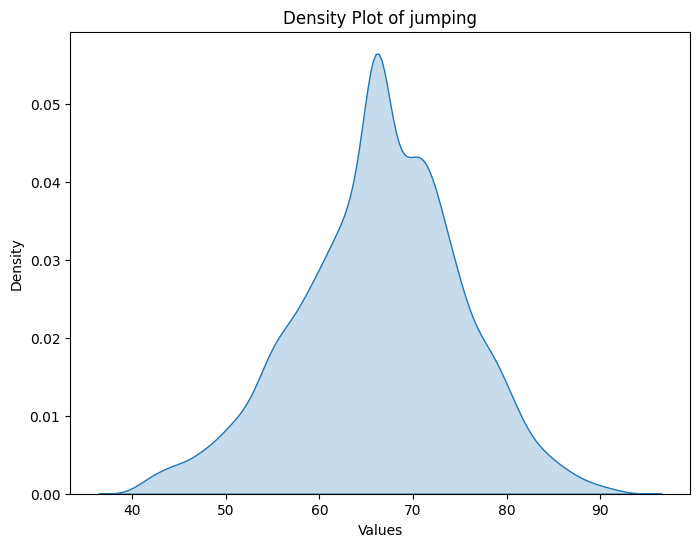

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


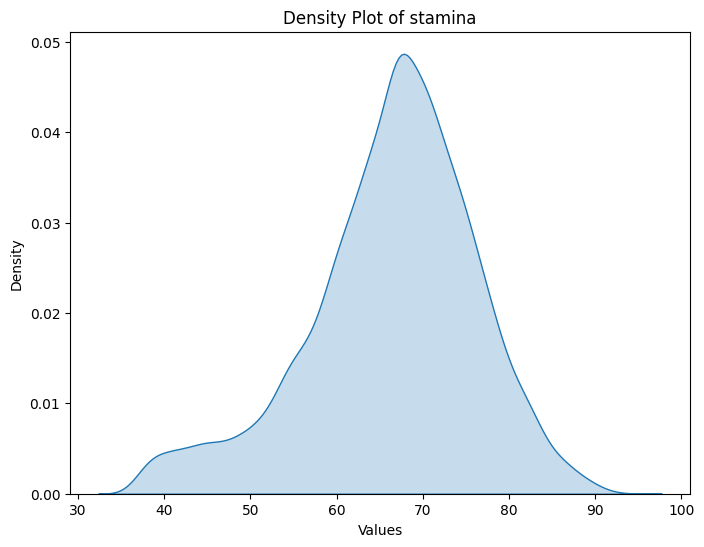

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


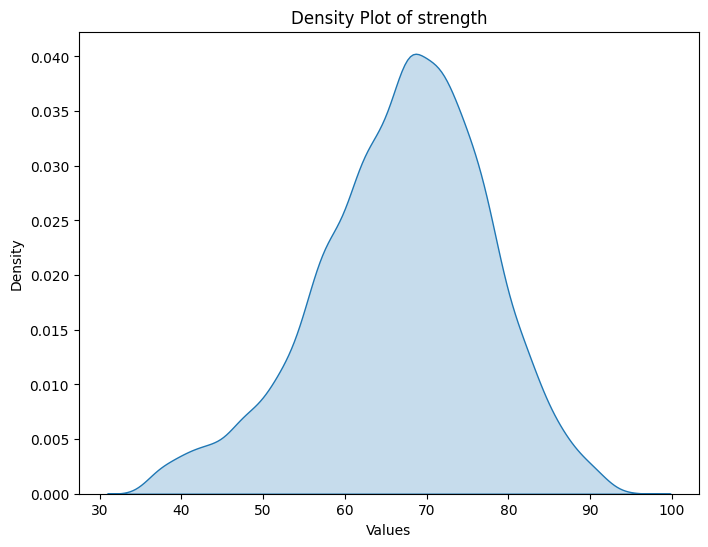

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


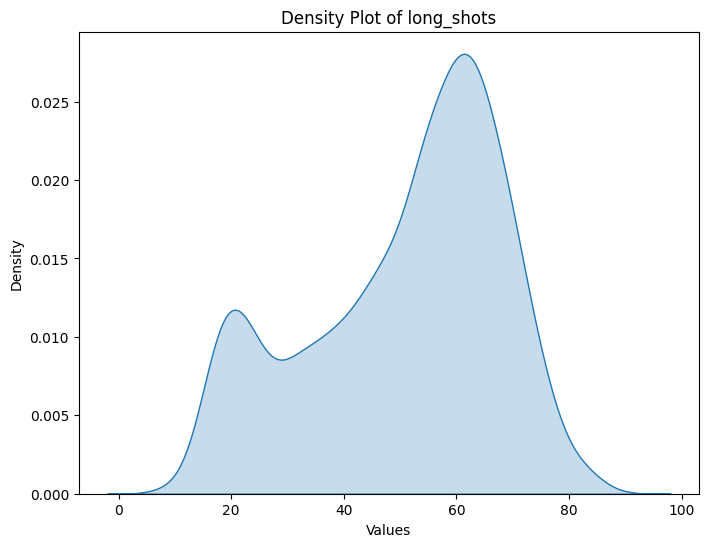

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


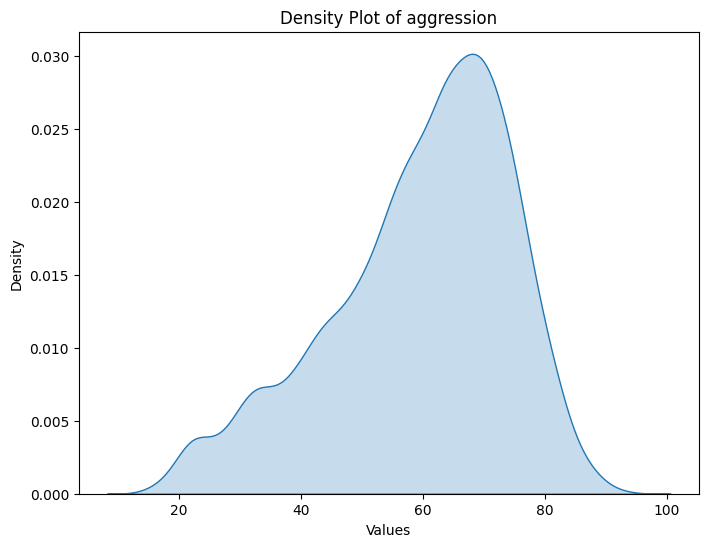

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


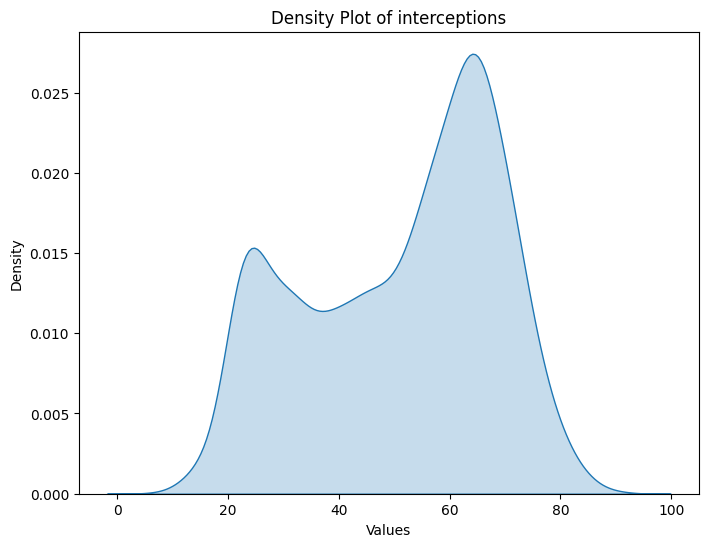

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


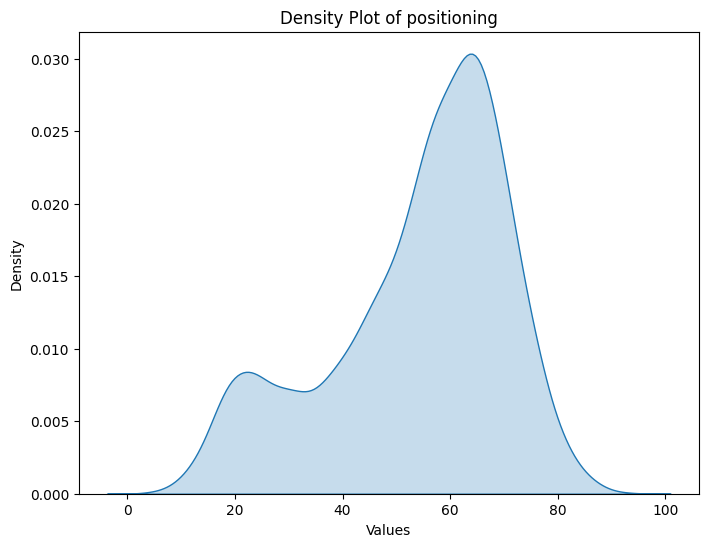

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


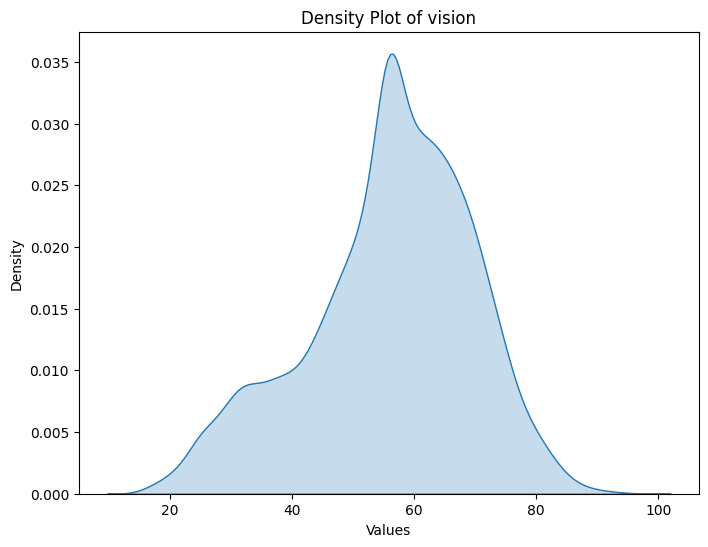

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


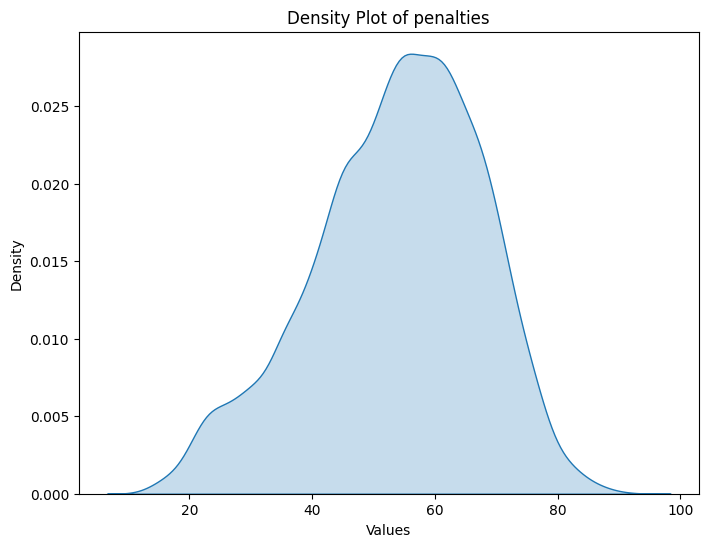

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


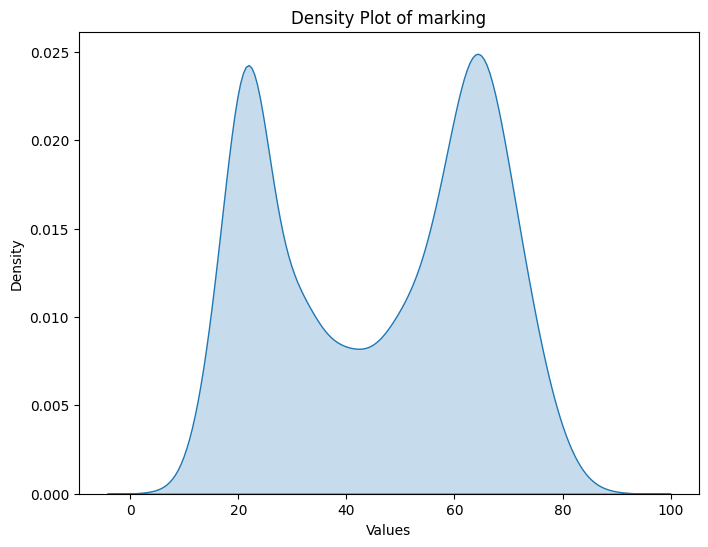

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


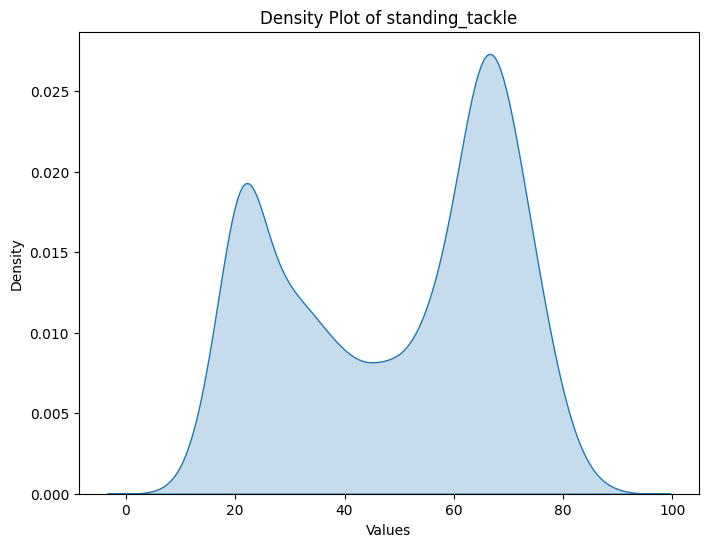

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


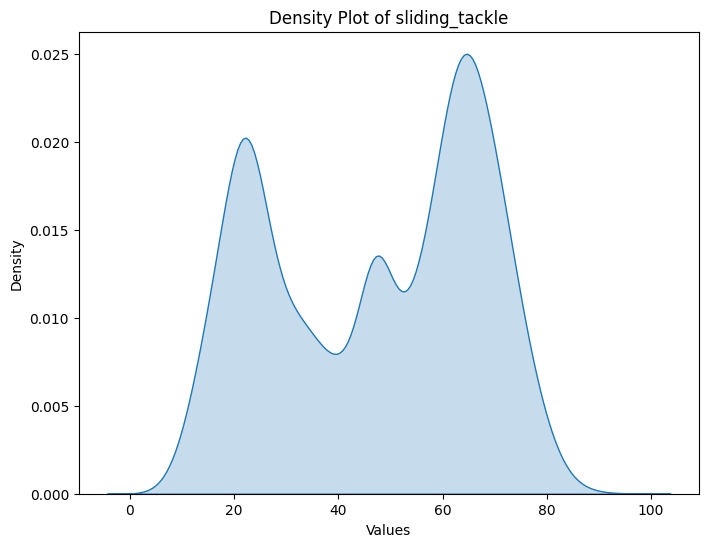

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


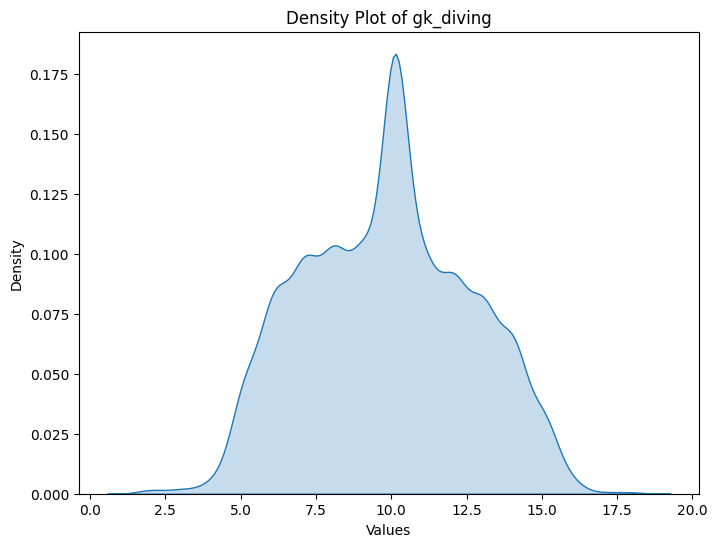

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


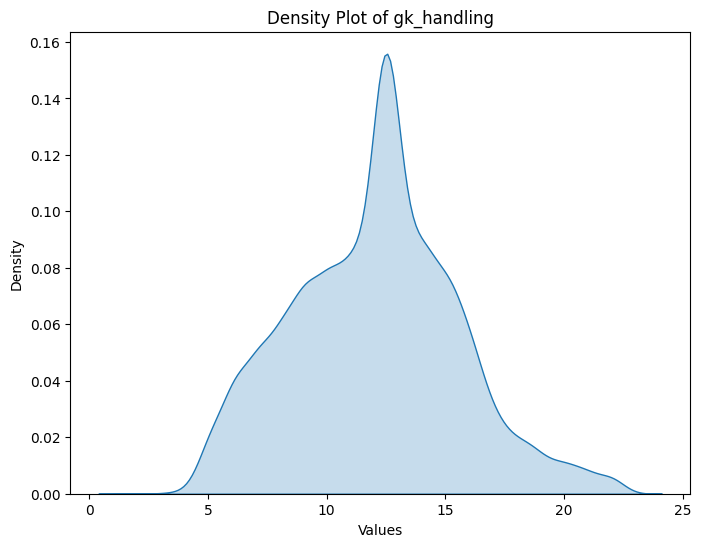

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


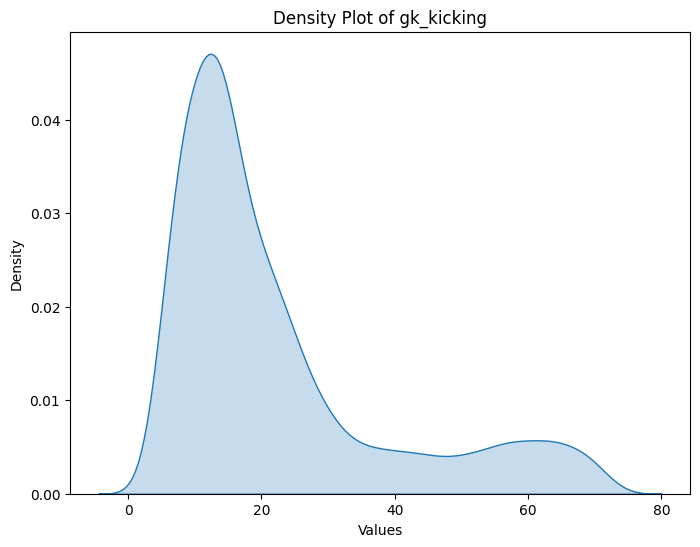

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


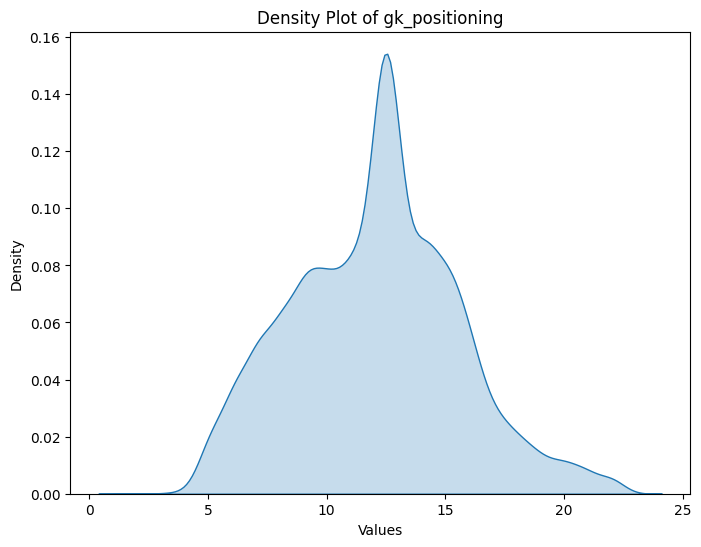

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


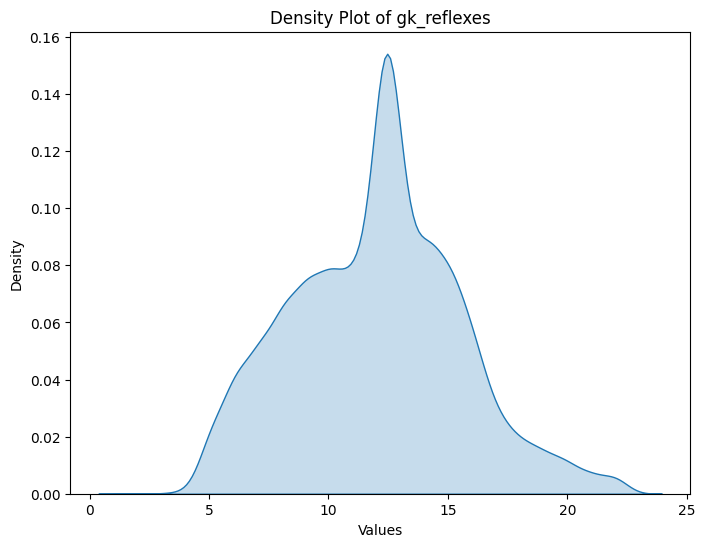

In [ ]:
def plot_density(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(df[column], shade=True)
        plt.xlabel('Values')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {column}')
        plt.show()

plot_density(X)

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


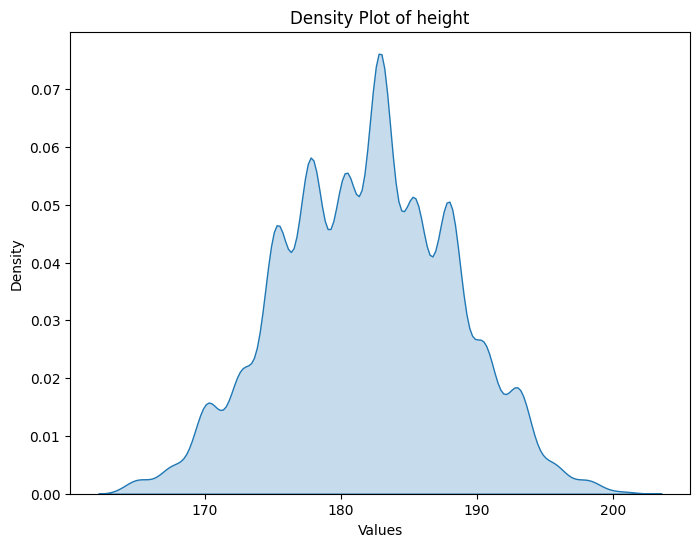

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


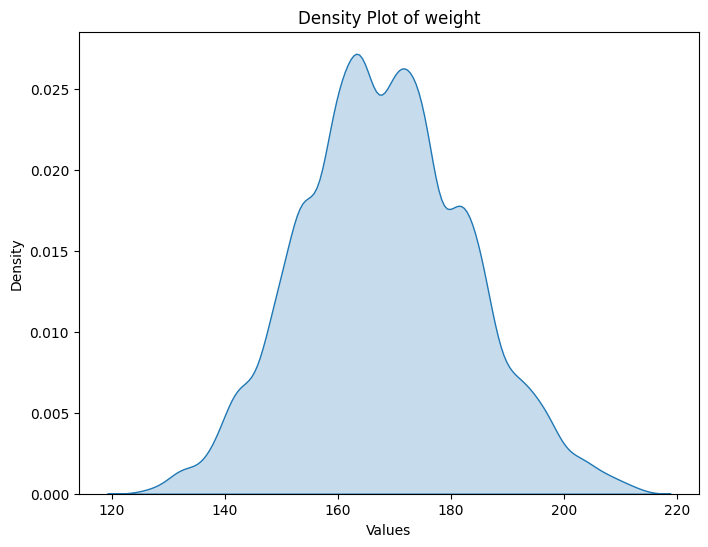

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


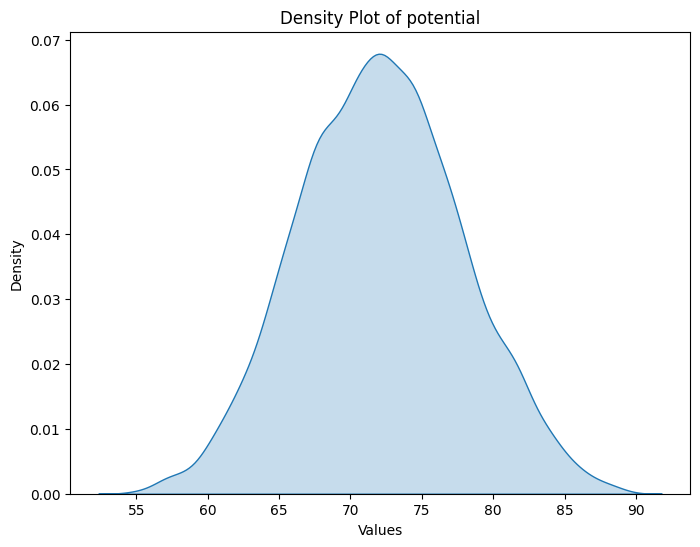

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


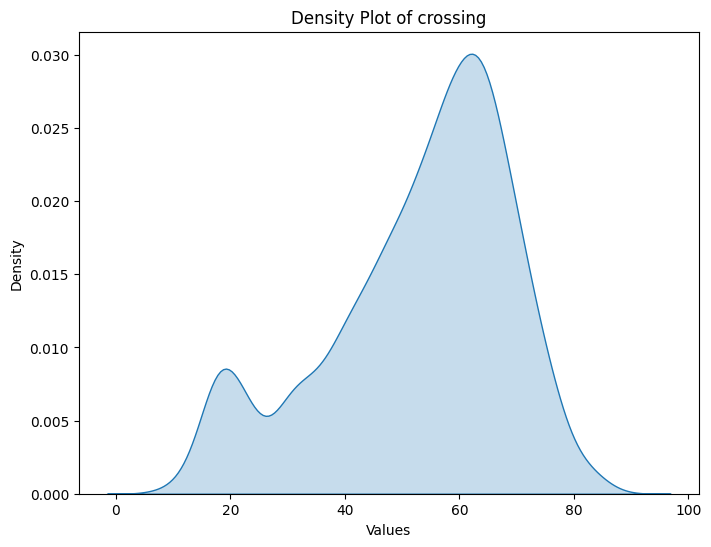

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


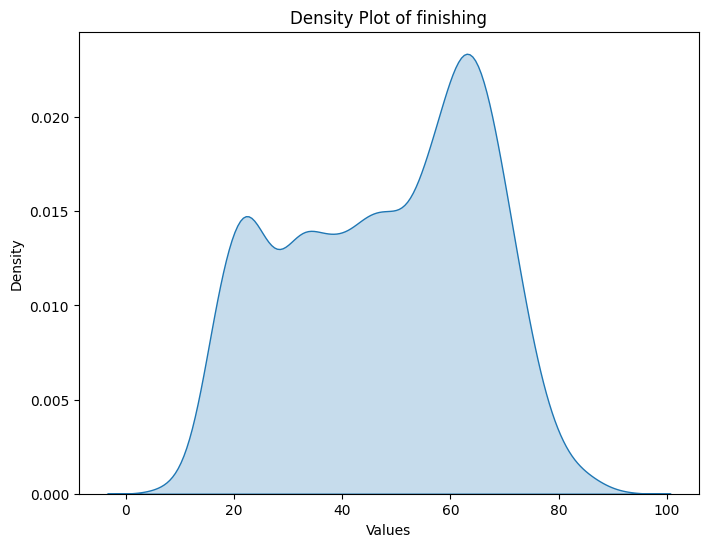

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


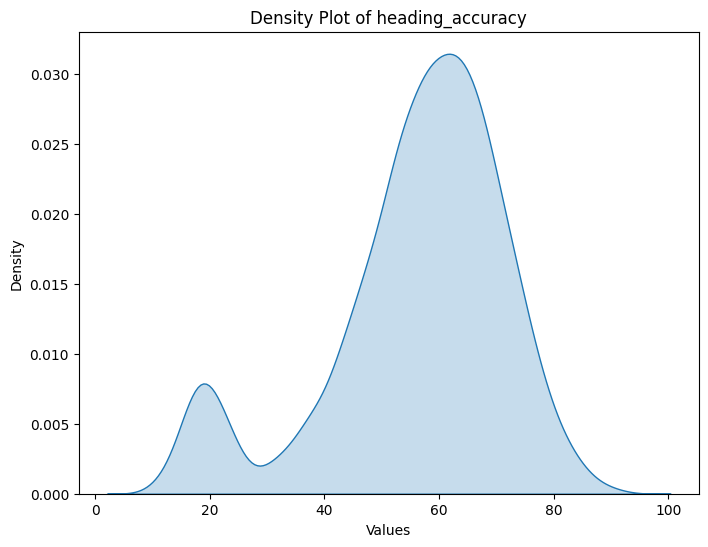

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


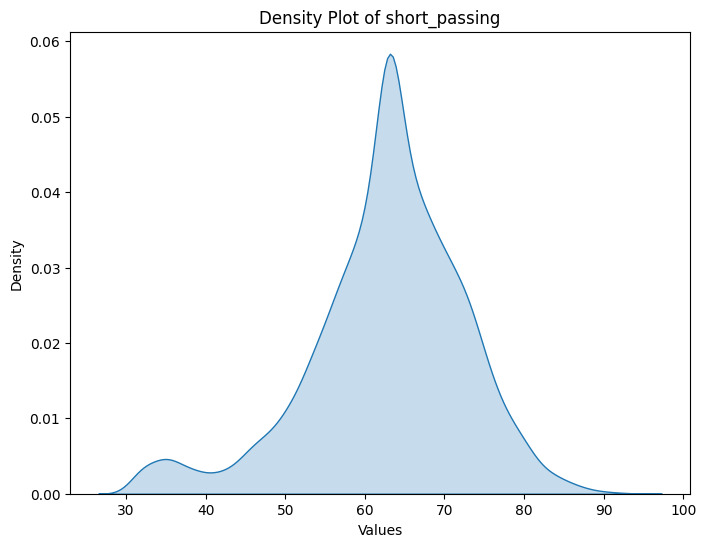

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


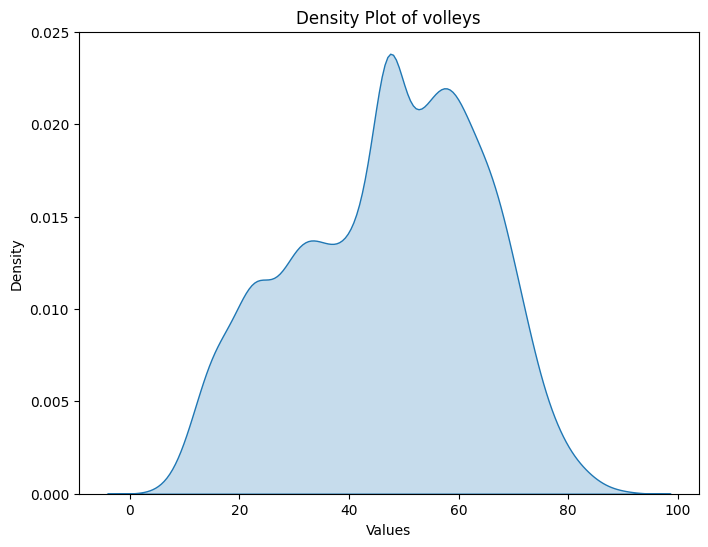

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


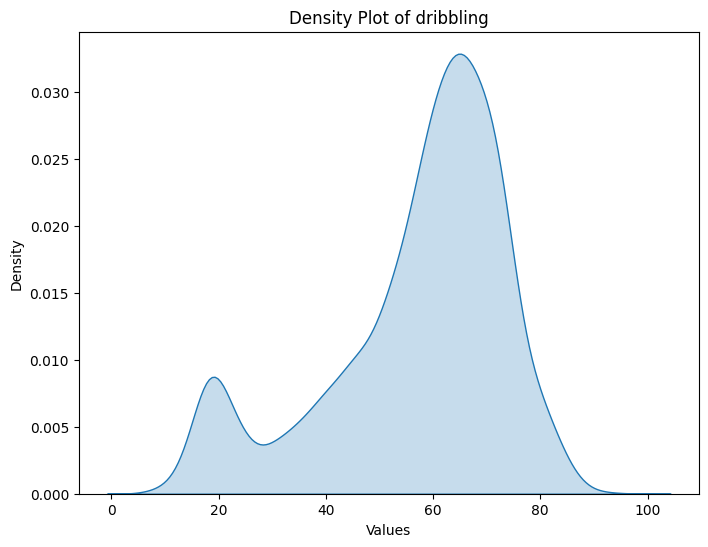

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


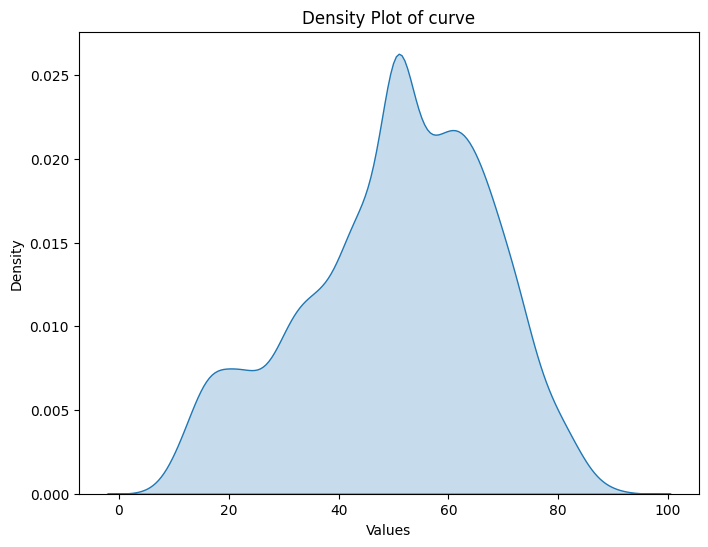

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


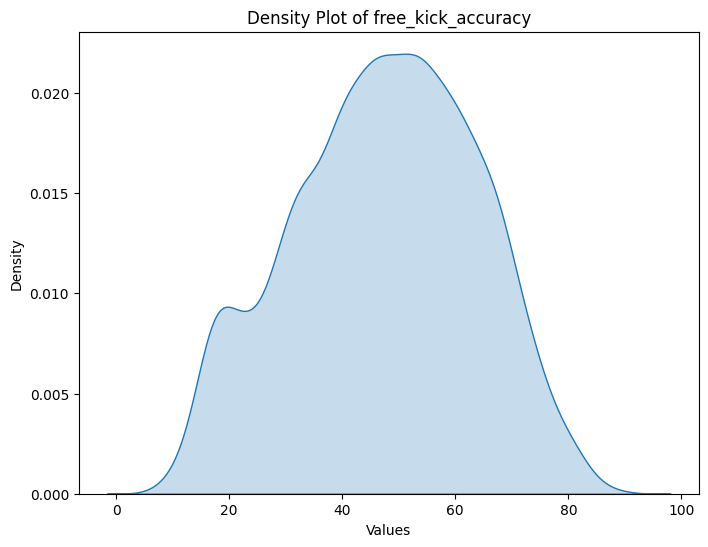

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


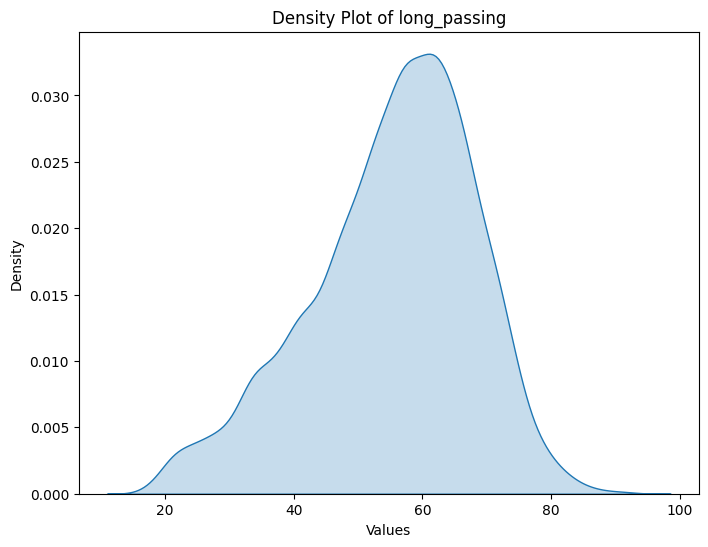

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


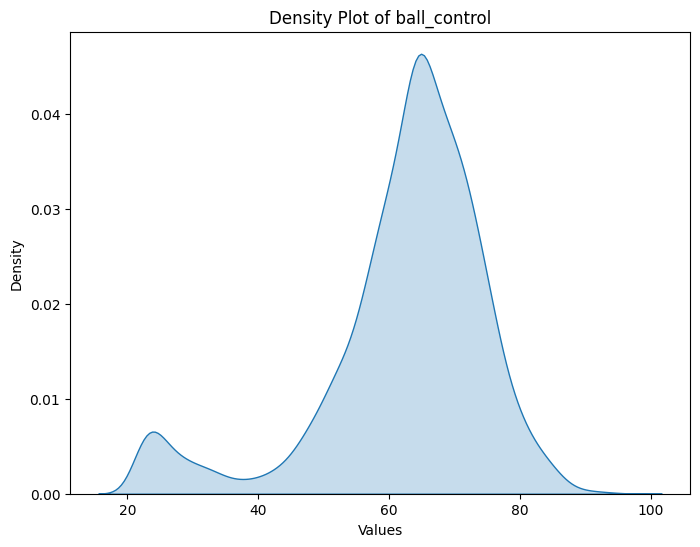

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


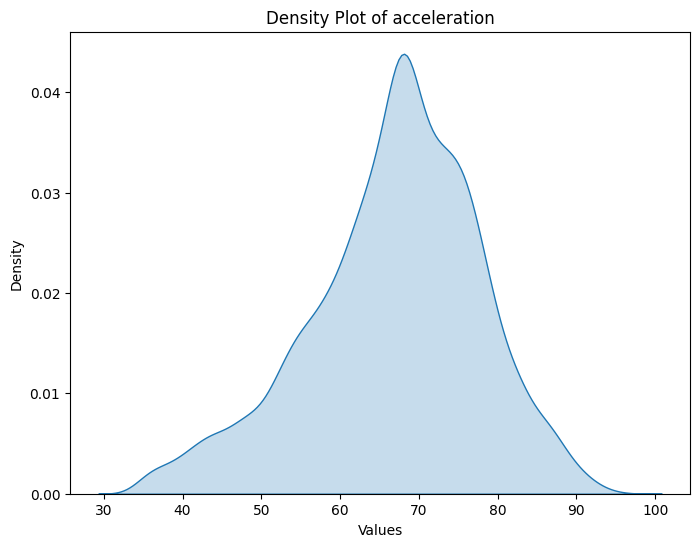

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


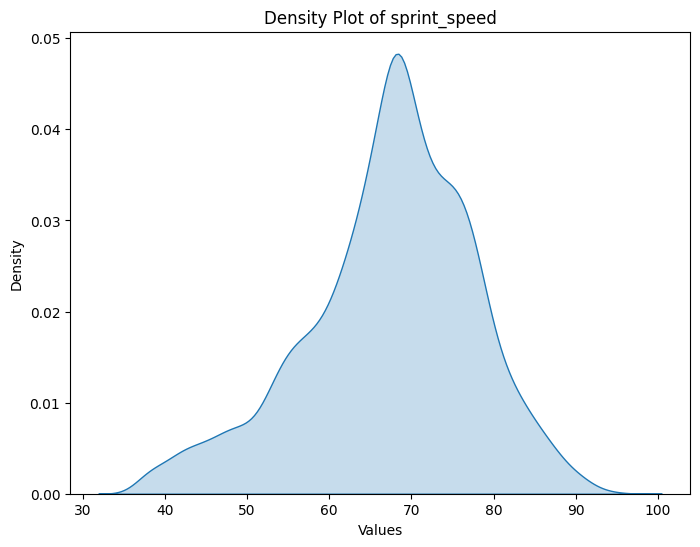

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


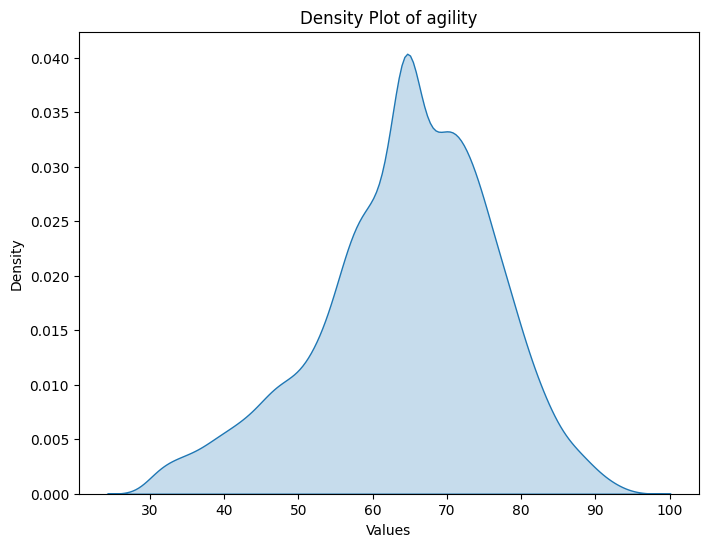

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


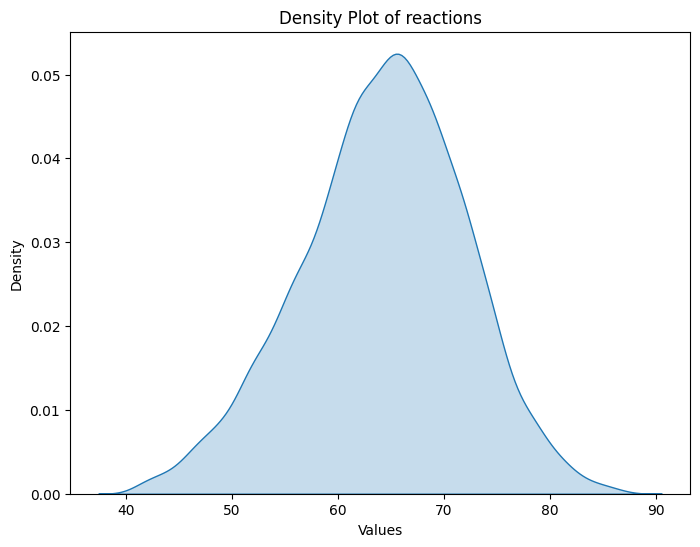

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


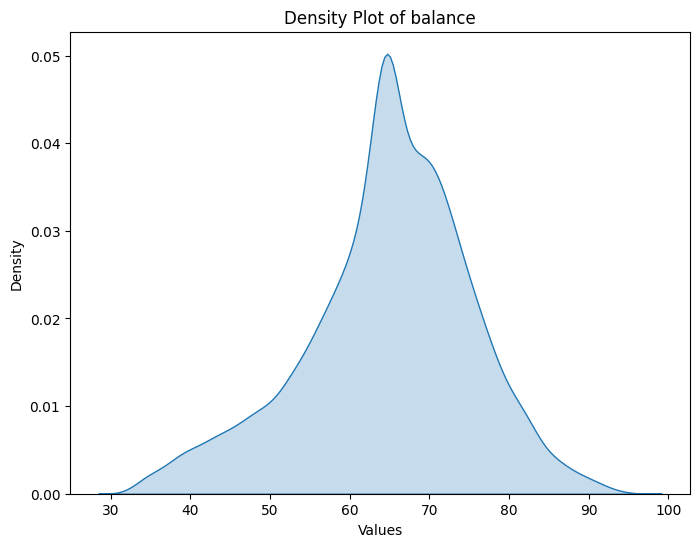

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


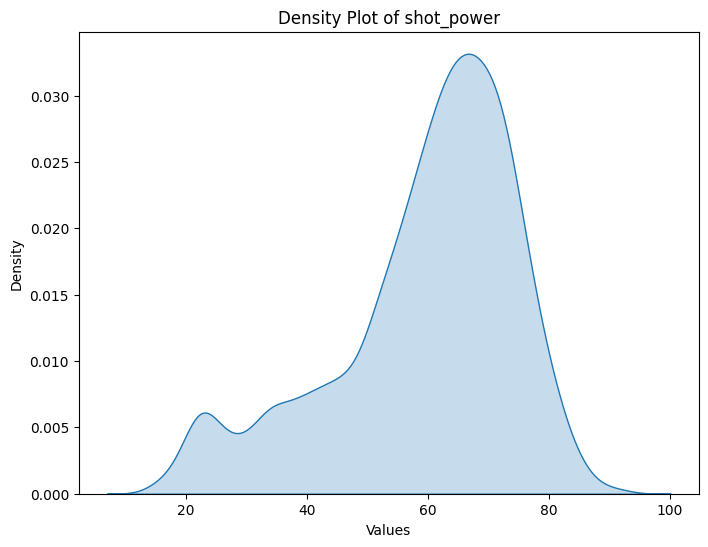

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


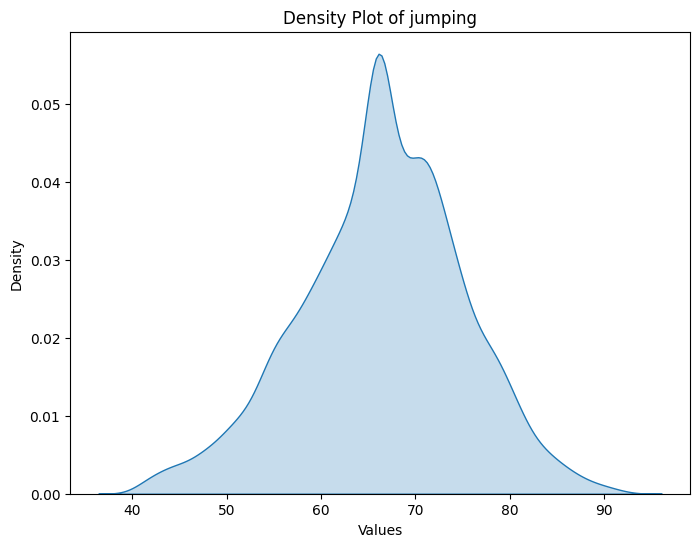

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


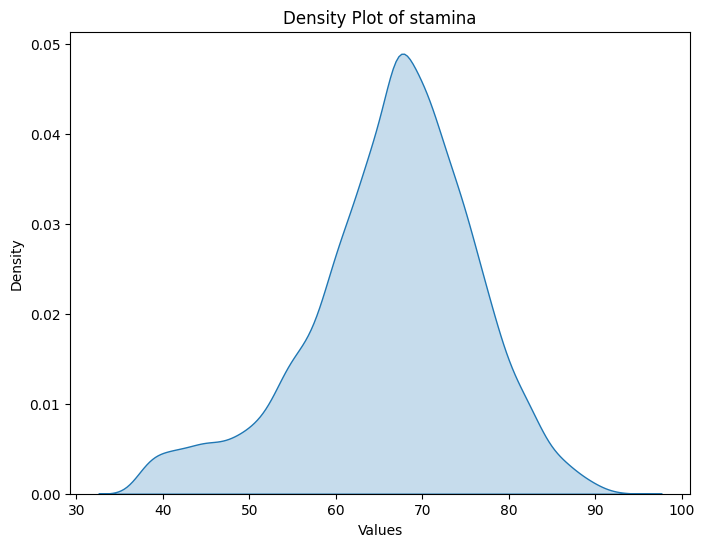

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


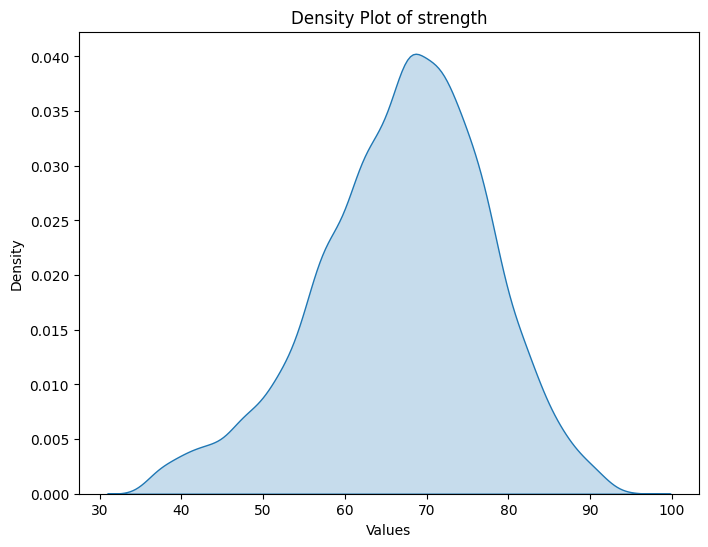

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


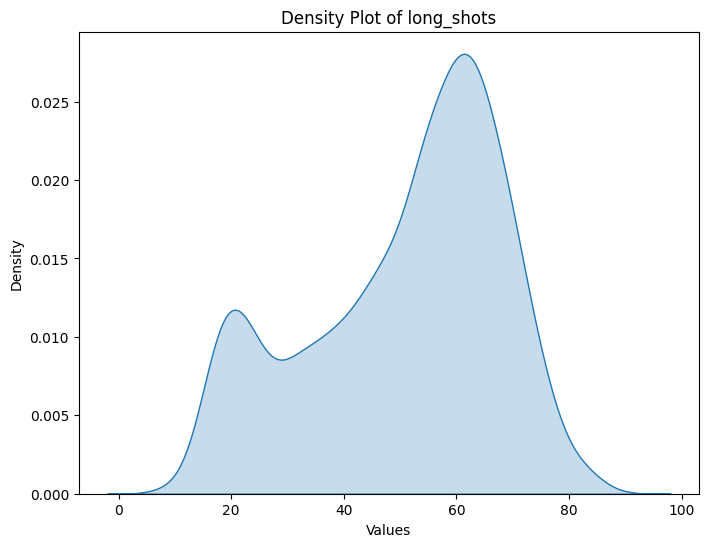

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


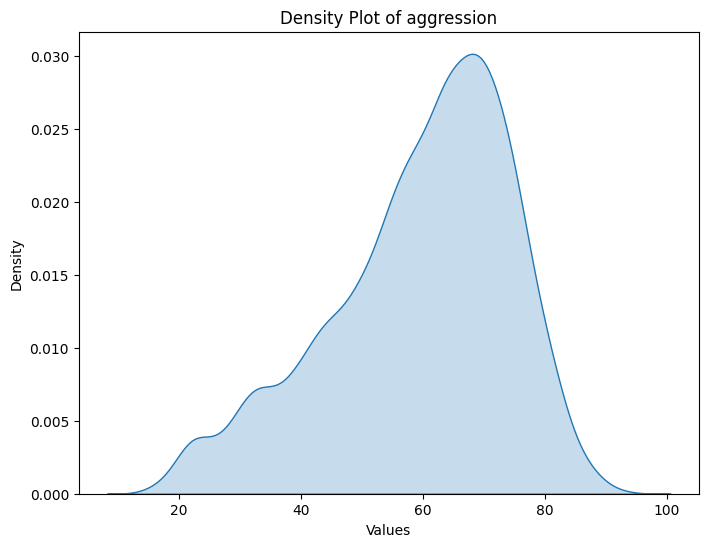

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


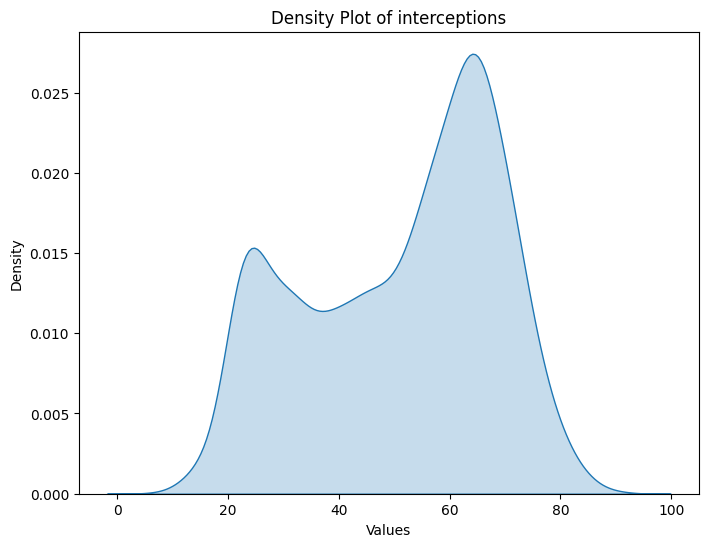

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


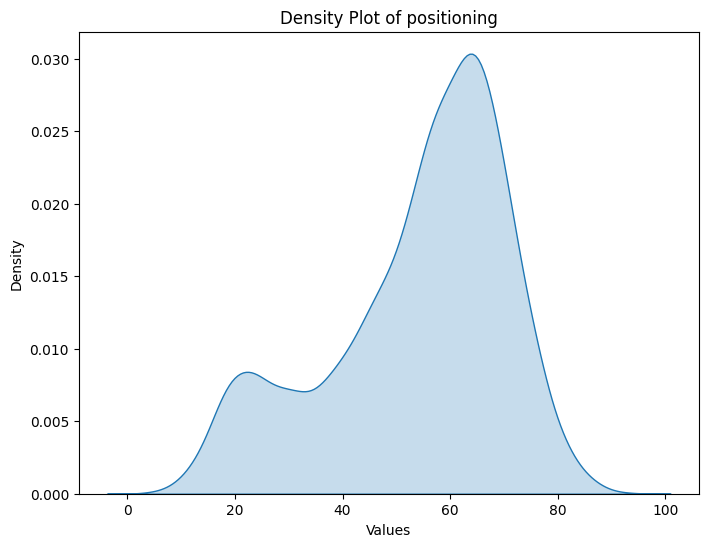

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


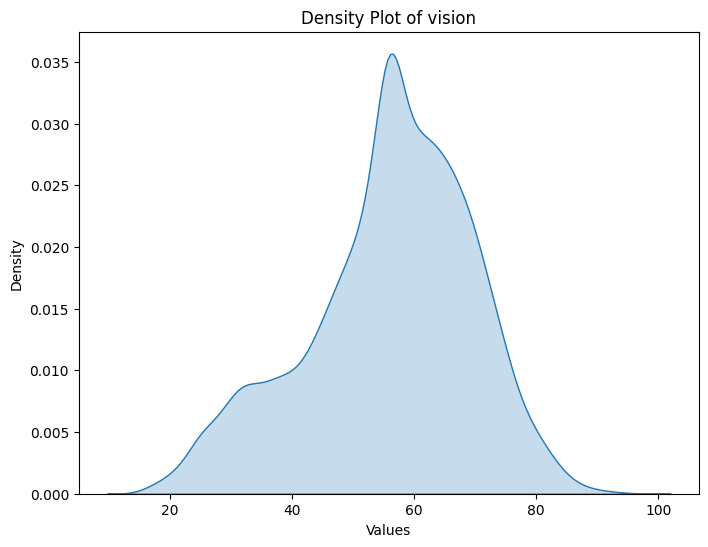

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


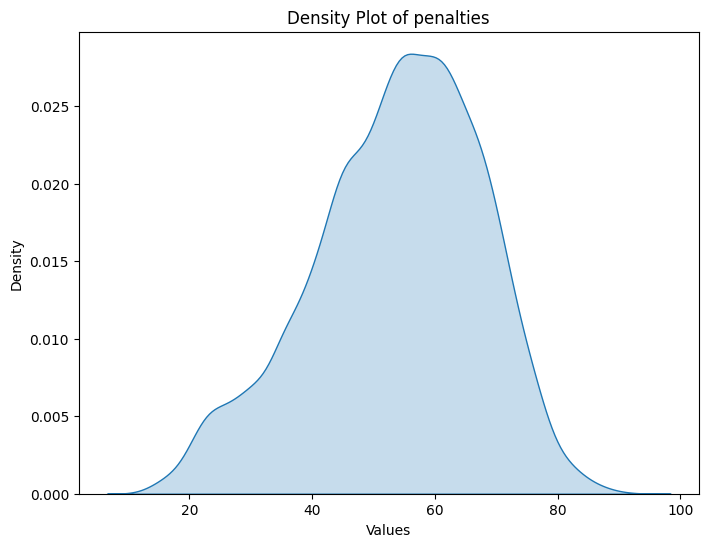

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


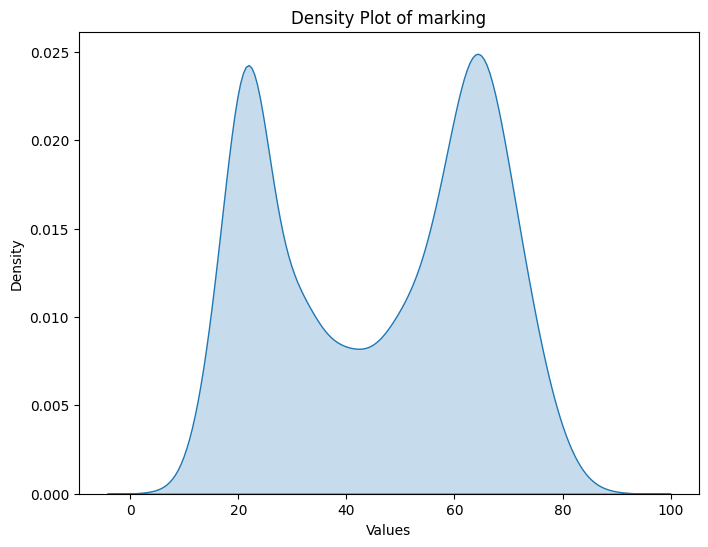

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


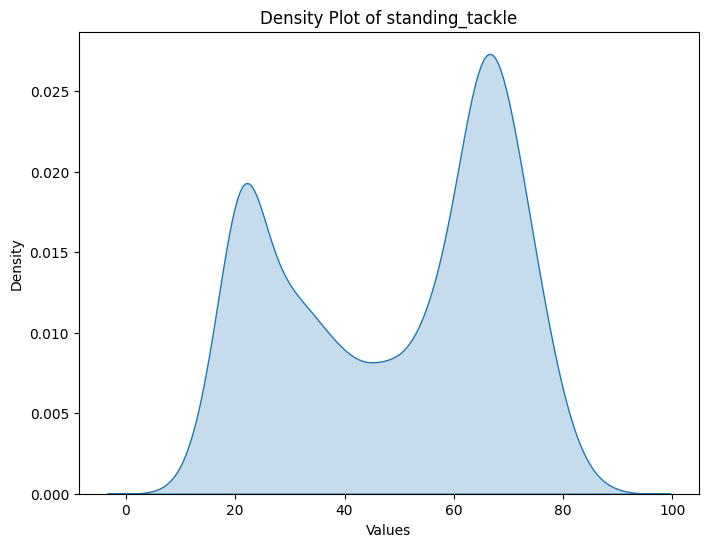

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


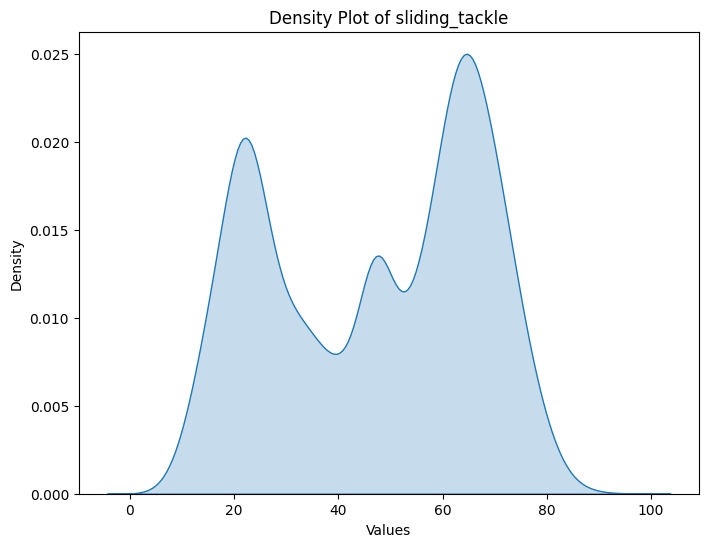

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


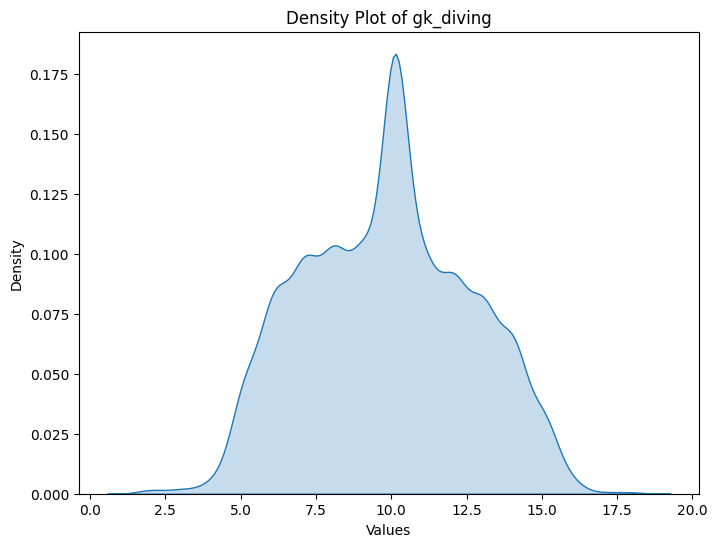

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


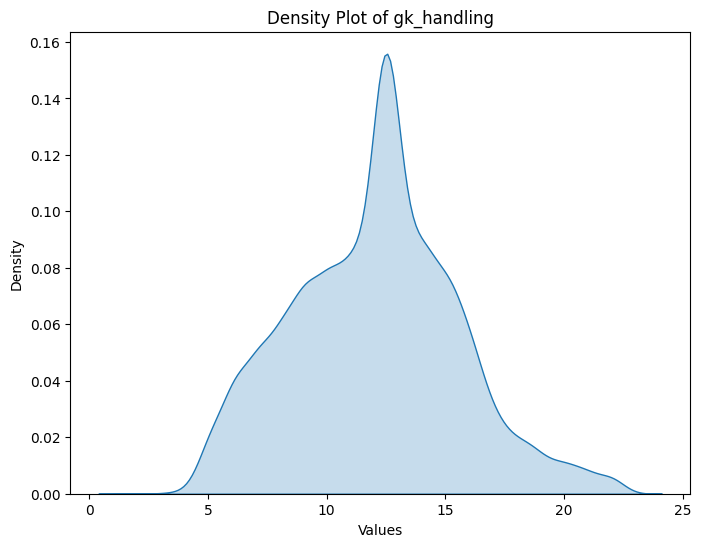

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


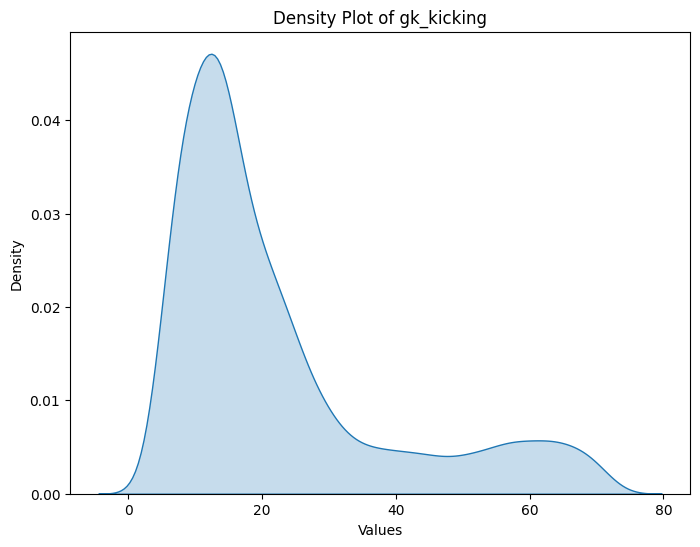

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


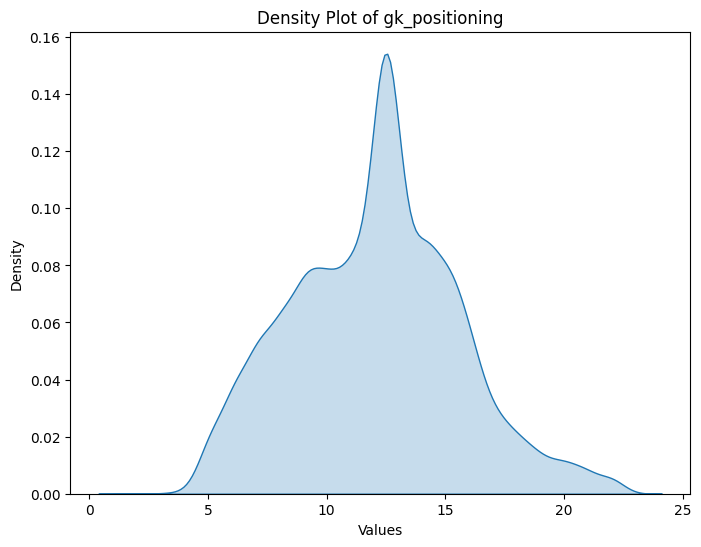

<ipython-input-107-c3a633cd1f06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


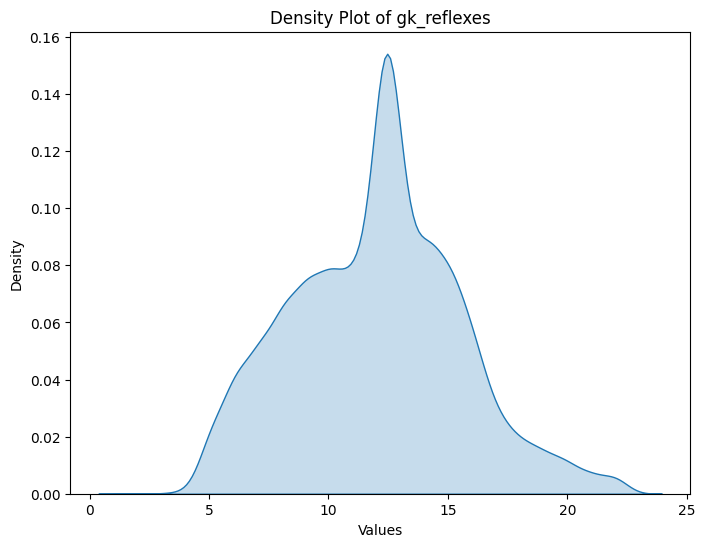

In [ ]:
# there are few more outliers present let's remove them and check for the density of data
handle_outliers(X) # removing again
plot_density(X)

In [ ]:
df_standard_scaled.head()

height    weight  potential  crossing  finishing  heading_accuracy  \
0 -1.050236 -0.967953  -1.910000 -0.167647  -0.031767         -0.629387   
1  0.968817  0.386367  -0.297269 -1.015899  -0.576106          1.229359   
2 -0.242615 -0.967953  -0.264017 -0.656570  -0.281584          0.674782   
3 -0.242615 -0.493941   0.253054  0.557490   1.093725          0.747304   
4 -1.050236 -0.358509   0.648755  1.060550  -0.577683         -0.058965   

   short_passing   volleys  dribbling     curve  ...    vision  penalties  \
0      -0.637279 -0.537186  -0.164134 -0.024980  ... -0.051075   0.595410   
1      -0.809795 -1.573166  -0.715591 -1.181030  ... -0.261664  -1.329164   
2       0.200998 -1.081848  -0.989906  0.079093  ...  0.131436  -1.585082   
3       0.998942  1.180463   1.078484  1.735255  ...  1.151390   0.741007   
4       0.536310 -0.242395   0.231219  0.979181  ...  0.296397   0.121270   

    marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0  0.832314         0.708698        0.468714   0.942931     0.231733   
1  1.239560         1.043584        0.915606   0.455616    -1.709028   
2  1.268055         1.041243        1.617866   0.333787     1.106442   
3 -0.799756        -0.585884       -1.098956  -0.431993     1.038105   
4  1.414331         1.237022        1.085851  -0.675650     1.420791   

   gk_kicking  gk_positioning  gk_reflexes  
0   -0.193602       -0.487749    -0.452422  
1   -0.916759       -0.849919     0.880124  
2    0.026364        0.885763     0.023487  
3    0.297224        1.227433     1.424021  
4    2.217400        1.303967     1.538239  

[5 rows x 36 columns]

In [ ]:
from scipy import stats


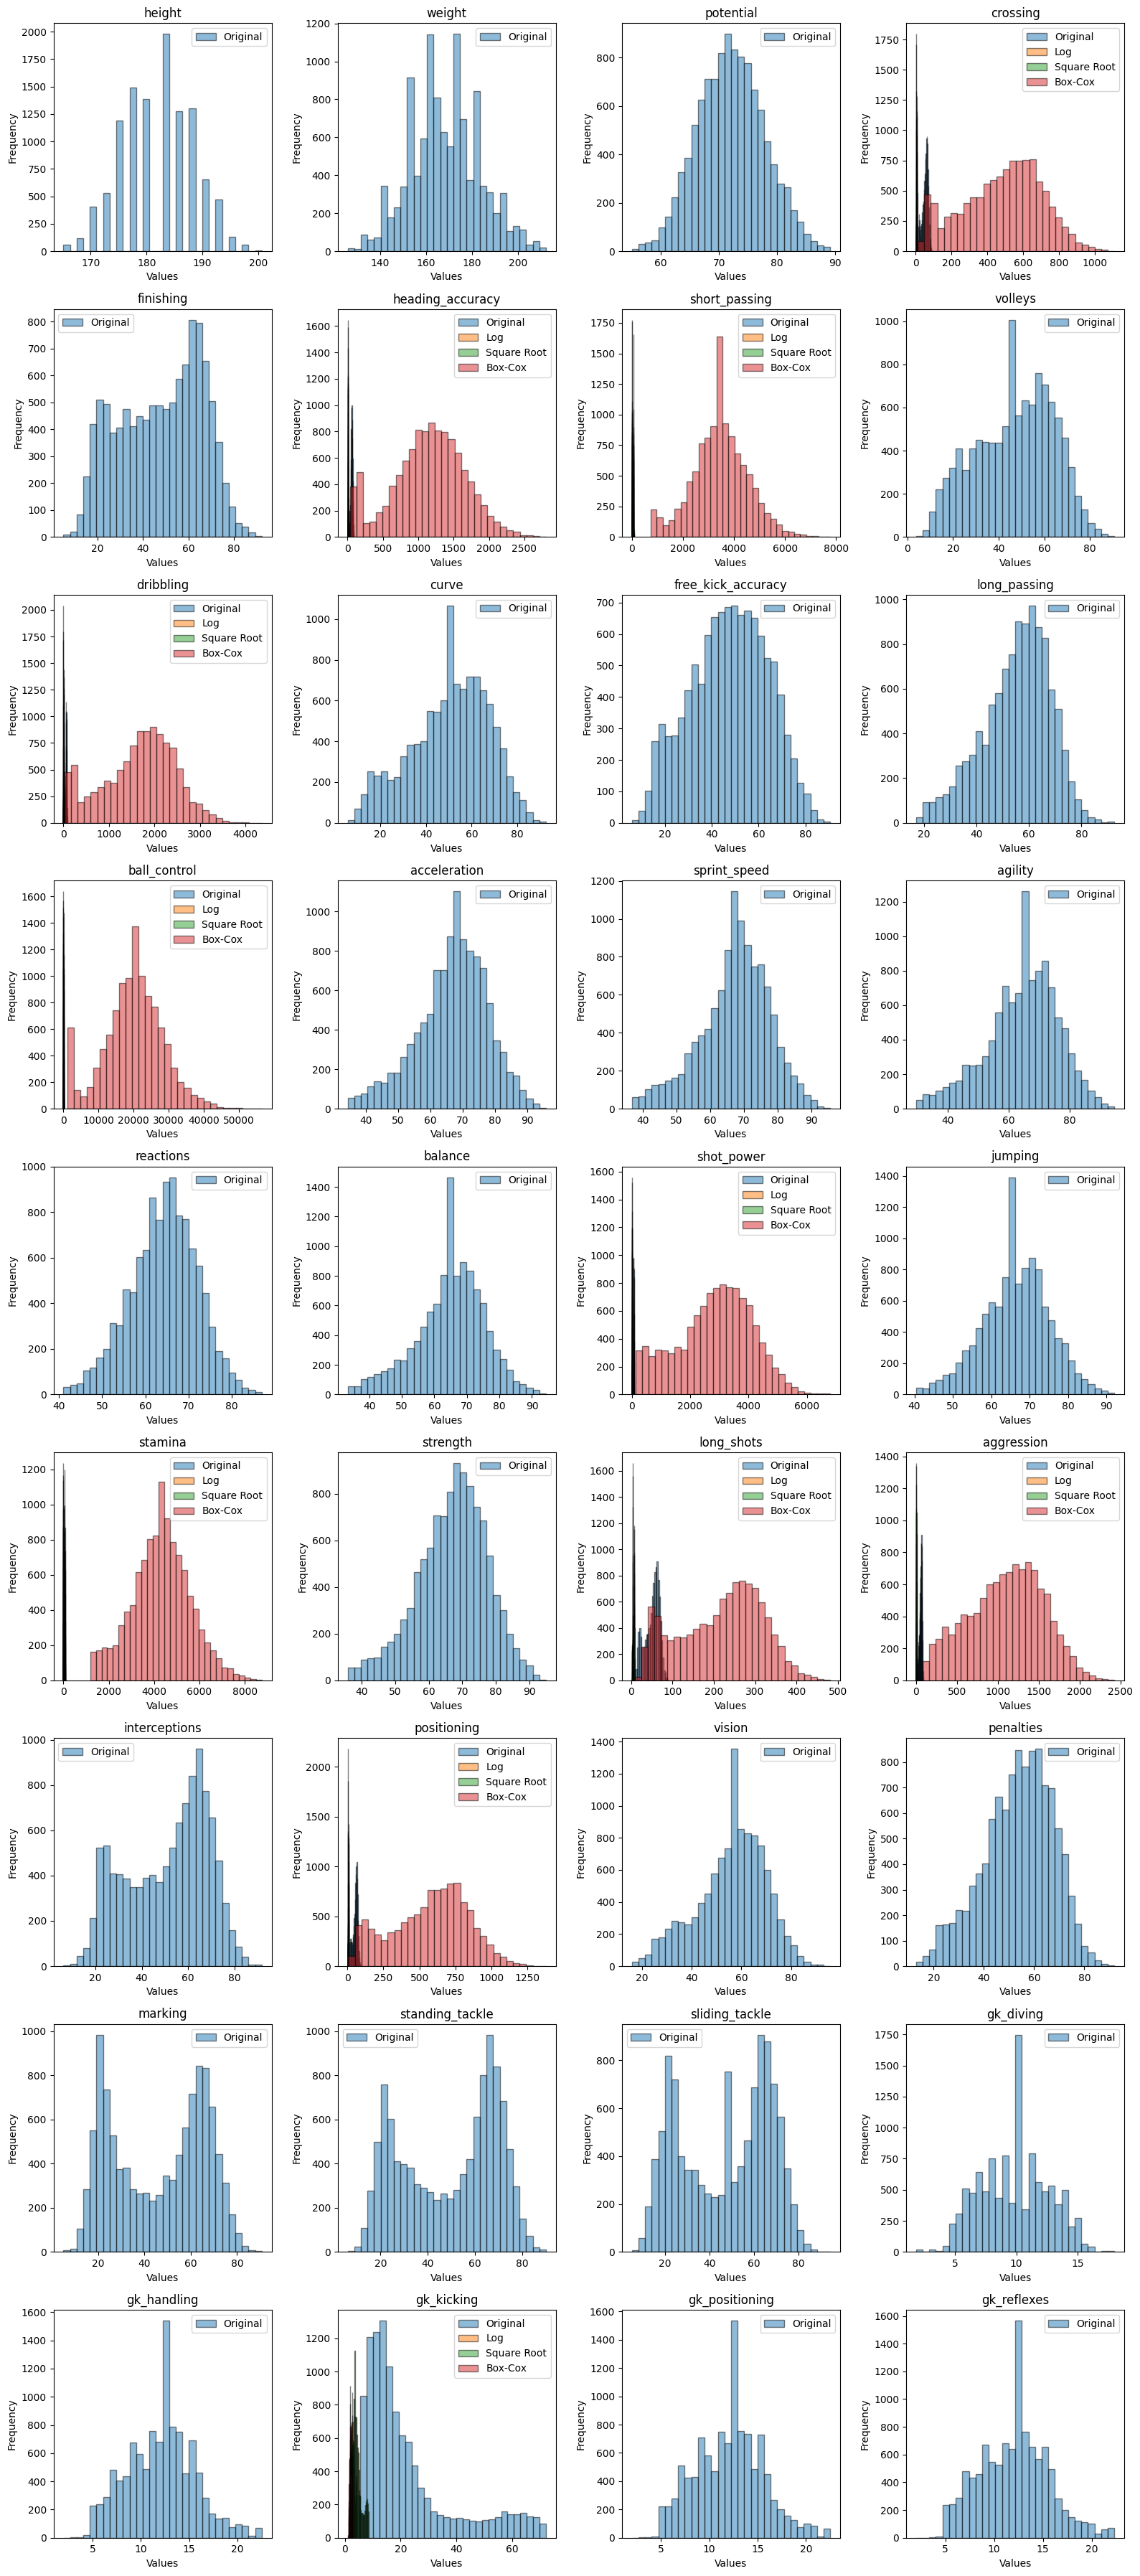

In [ ]:
def transform_and_visualize(df, skew_threshold=0.5):
    # Apply transformations and visualize in subplots
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4  # Adjust the number of rows based on the number of columns

    fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    axs = axs.ravel()

    for i, column in enumerate(df.columns):
        # Check if skewness is present
        skewness = stats.skew(df[column])
        if abs(skewness) > skew_threshold:
            # Logarithmic transformation
            df['{}_log'.format(column)] = np.log1p(df[column])

            # Square root transformation
            df['{}_sqrt'.format(column)] = np.sqrt(df[column])

            # Box-Cox transformation
            df['{}_boxcox'.format(column)], _ = stats.boxcox(df[column])

            # Plot original and transformed distributions
            axs[i].hist(df[column], bins=30, edgecolor='black', alpha=0.5, label='Original')
            axs[i].hist(df['{}_log'.format(column)], bins=30, edgecolor='black', alpha=0.5, label='Log')
            axs[i].hist(df['{}_sqrt'.format(column)], bins=30, edgecolor='black', alpha=0.5, label='Square Root')
            axs[i].hist(df['{}_boxcox'.format(column)], bins=30, edgecolor='black', alpha=0.5, label='Box-Cox')
            axs[i].set_xlabel('Values')
            axs[i].set_ylabel('Frequency')
            axs[i].set_title('{}'.format(column))
            axs[i].legend()
        else:
            # Plot original distribution only
            axs[i].hist(df[column], bins=30, edgecolor='black', alpha=0.5, label='Original')
            axs[i].set_xlabel('Values')
            axs[i].set_ylabel('Frequency')
            axs[i].set_title('{}'.format(column))
            axs[i].legend()

    plt.tight_layout()
    plt.show()

# Assuming your scaled DataFrame is called 'scaled_df'
# Assuming you want to apply transformations to all the columns

transform_and_visualize(X)

In [ ]:
X.head()

height  weight  potential   crossing  finishing  heading_accuracy  \
0  175.26   154.0  61.142857  50.142857  47.285714         46.285714   
1  187.96   174.0  70.380952  36.428571  37.428571         75.333333   
2  180.34   154.0  70.571429  42.238095  42.761905         66.666667   
3  180.34   161.0  73.533333  61.866667  67.666667         67.800000   
4  175.26   163.0  75.800000  70.000000  37.400000         55.200000   

   short_passing    volleys  dribbling      curve  ...  long_shots_boxcox  \
0      56.500000  38.000000  54.142857  50.000000  ...         246.316339   
1      54.809524  20.428571  44.857143  30.428571  ...          51.559394   
2      64.714286  28.761905  40.238095  51.761905  ...          51.004830   
3      72.533333  67.133333  75.066667  79.800000  ...         354.780942   
4      68.000000  43.000000  60.800000  67.000000  ...         160.415597   

   aggression_log  aggression_sqrt  aggression_boxcox  positioning_log  \
0        4.280627         8.443087        1462.167398         3.938804   
1        4.397970         8.960230        1822.599904         3.479040   
2        4.155156         7.922241        1154.759491         3.810886   
3        4.056989         7.536577         959.715313         4.182559   
4        4.239887         8.270429        1354.366159         4.120662   

   positioning_sqrt  positioning_boxcox  gk_kicking_log  gk_kicking_sqrt  \
0          7.096277          480.027568        2.999297         4.367085   
1          5.606119          213.750525        2.091276         2.663689   
2          6.647592          383.666791        3.166078         4.765951   
3          8.033264          734.467536        3.339322         5.215362   
4          7.784600          659.402029        4.094345         7.681146   

   gk_kicking_boxcox  
0           2.114188  
1           1.563701  
2           2.198652  
3           2.282109  
4           2.602362  

[5 rows x 69 columns]

In [84]:
# now let's normalize out dataset we are using standard scaler as almost columns are normally distributed now
# Z-score standardization
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(X),
                                  columns=list(X.columns))


In [ ]:
df_standard_scaled.to_csv('./scaled_data.csv')



---



In [ ]:
df_standard_scaled = pd.read_csv('scaled_data.csv')

In [ ]:
y = np.load('target.npy')

In [ ]:
corr_matrix = df_standard_scaled.corr()

In [ ]:
plt.figure(figsize=(50, 26))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [ ]:
vif = calculate_vif(df_standard_scaled)


In [ ]:
high_vif_vars = vif[vif['VIF'] > 5]['Variable'].tolist()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_standard_scaled)

PCA()

In [ ]:
principal_components = pca.transform(df_standard_scaled)


In [ ]:
# Determine the number of components to keep (e.g., based on explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)


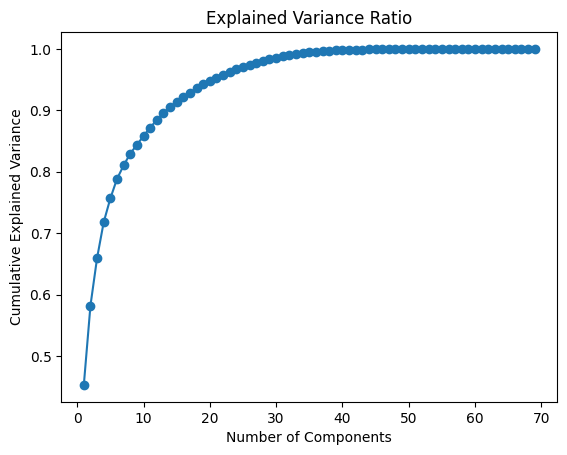

In [ ]:
plt.figure()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [ ]:
threshold = 0.95  # Set your desired threshold (e.g., 95% of variance coverage)
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1


In [ ]:
print("Number of components selected:", num_components)


Number of components selected: 21


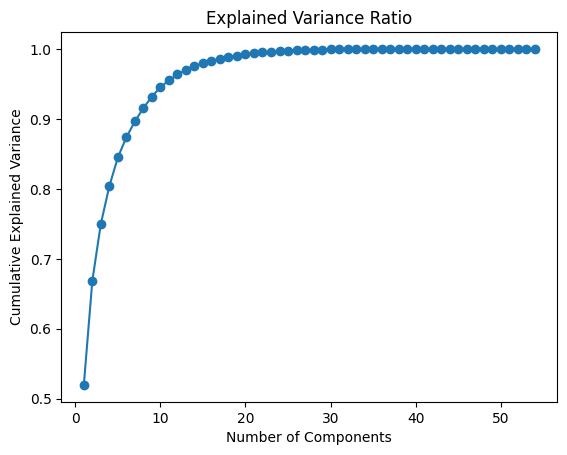

Number of components selected: 11


In [ ]:
# now let's consider the VIF feature and do the above step again
new_df  = df_standard_scaled[high_vif_vars]
pca = PCA()
pca.fit(new_df)
principal_components = pca.transform(new_df)
# Determine the number of components to keep (e.g., based on explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()
threshold = 0.95  # Set your desired threshold (e.g., 95% of variance coverage)
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
print("Number of components selected:", num_components)


We have got two different number of comonents using PCA one we have got after the direct PCA which is 21 and second we have got 11 with taking only VIF feature.

In [ ]:
# let's proceed with 11 features only  Apply dimensionality reduction using the selected number of components
pca = PCA(n_components=num_components)
selected_components = pca.fit_transform(df_standard_scaled)


In [ ]:
column_names = df_standard_scaled.columns
selected_feature_names = [f'PC{i+1}_{column_names[i]}' for i in range(num_components)]

selected_components_df = pd.DataFrame(selected_components, columns=selected_feature_names)

In [ ]:
selected_components_df.head()

PC1_height  PC2_weight  PC3_potential  PC4_crossing  PC5_finishing  \
0   -0.329523   -1.170505      -0.896025     -1.657008       1.945289   
1    4.657026   -5.886531      -2.996422      1.434926      -2.242855   
2    3.994097   -3.447526       0.697656     -1.437922      -0.162140   
3   -4.081023    2.784995       2.675493      2.312256      -1.606131   
4   -1.442764   -1.841494       4.558416     -2.447304       1.795195   

   PC6_heading_accuracy  PC7_short_passing  PC8_volleys  PC9_dribbling  \
0             -0.424094           2.862851     1.840328       0.261907   
1             -1.481959           0.143528    -0.536930      -0.015577   
2             -1.742877          -2.289422    -1.784640       0.678780   
3             -3.506158          -0.218656    -0.801472       0.365641   
4             -1.544223          -0.593520    -1.154315      -0.660249   

   PC10_curve  PC11_free_kick_accuracy  
0    0.900413                 0.546487  
1    0.243882                 1.179255  
2    1.526477                -0.197396  
3   -0.172978                 0.340284  
4   -0.926514                 0.663956

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_components_df, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def evaluate_regression_algorithms(X_train, y_train, X_test, y_test):
    # Initialize a dictionary to store the performance metrics
    metrics = {}

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_reg_preds = linear_reg.predict(X_test)
    metrics['Linear Regression'] = {
        'MSE': mean_squared_error(y_test, linear_reg_preds),
        'MAE': mean_absolute_error(y_test, linear_reg_preds)
    }

    # Decision Tree Regression
    dt_reg = DecisionTreeRegressor()
    dt_reg.fit(X_train, y_train)
    dt_reg_preds = dt_reg.predict(X_test)
    metrics['Decision Tree Regression'] = {
        'MSE': mean_squared_error(y_test, dt_reg_preds),
        'MAE': mean_absolute_error(y_test, dt_reg_preds)
    }

    # Random Forest Regression
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    rf_reg_preds = rf_reg.predict(X_test)
    metrics['Random Forest Regression'] = {
        'MSE': mean_squared_error(y_test, rf_reg_preds),
        'MAE': mean_absolute_error(y_test, rf_reg_preds)
    }

    return metrics


In [ ]:
def visualize_results(metrics):
    algorithms = list(metrics.keys())
    mse_values = [metrics[alg]['MSE'] for alg in algorithms]
    mae_values = [metrics[alg]['MAE'] for alg in algorithms]

    # Plot MSE
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.bar(algorithms, mse_values)
    plt.xlabel('Algorithm')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error')

    plt.xticks(rotation=45)

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.bar(algorithms, mae_values)
    plt.xlabel('Algorithm')
    plt.ylabel('MAE')
    plt.title('Mean Absolute Error')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
def perform_regression_analysis(X_train, y_train, X_test, y_test):
    # Evaluate regression algorithms
    metrics = evaluate_regression_algorithms(X_train, y_train, X_test, y_test)

    # Visualize the results
    visualize_results(metrics)

    # Determine the best-performing algorithm based on MSE
    best_algorithm = min(metrics, key=lambda x: metrics[x]['MSE'])

    return best_algorithm


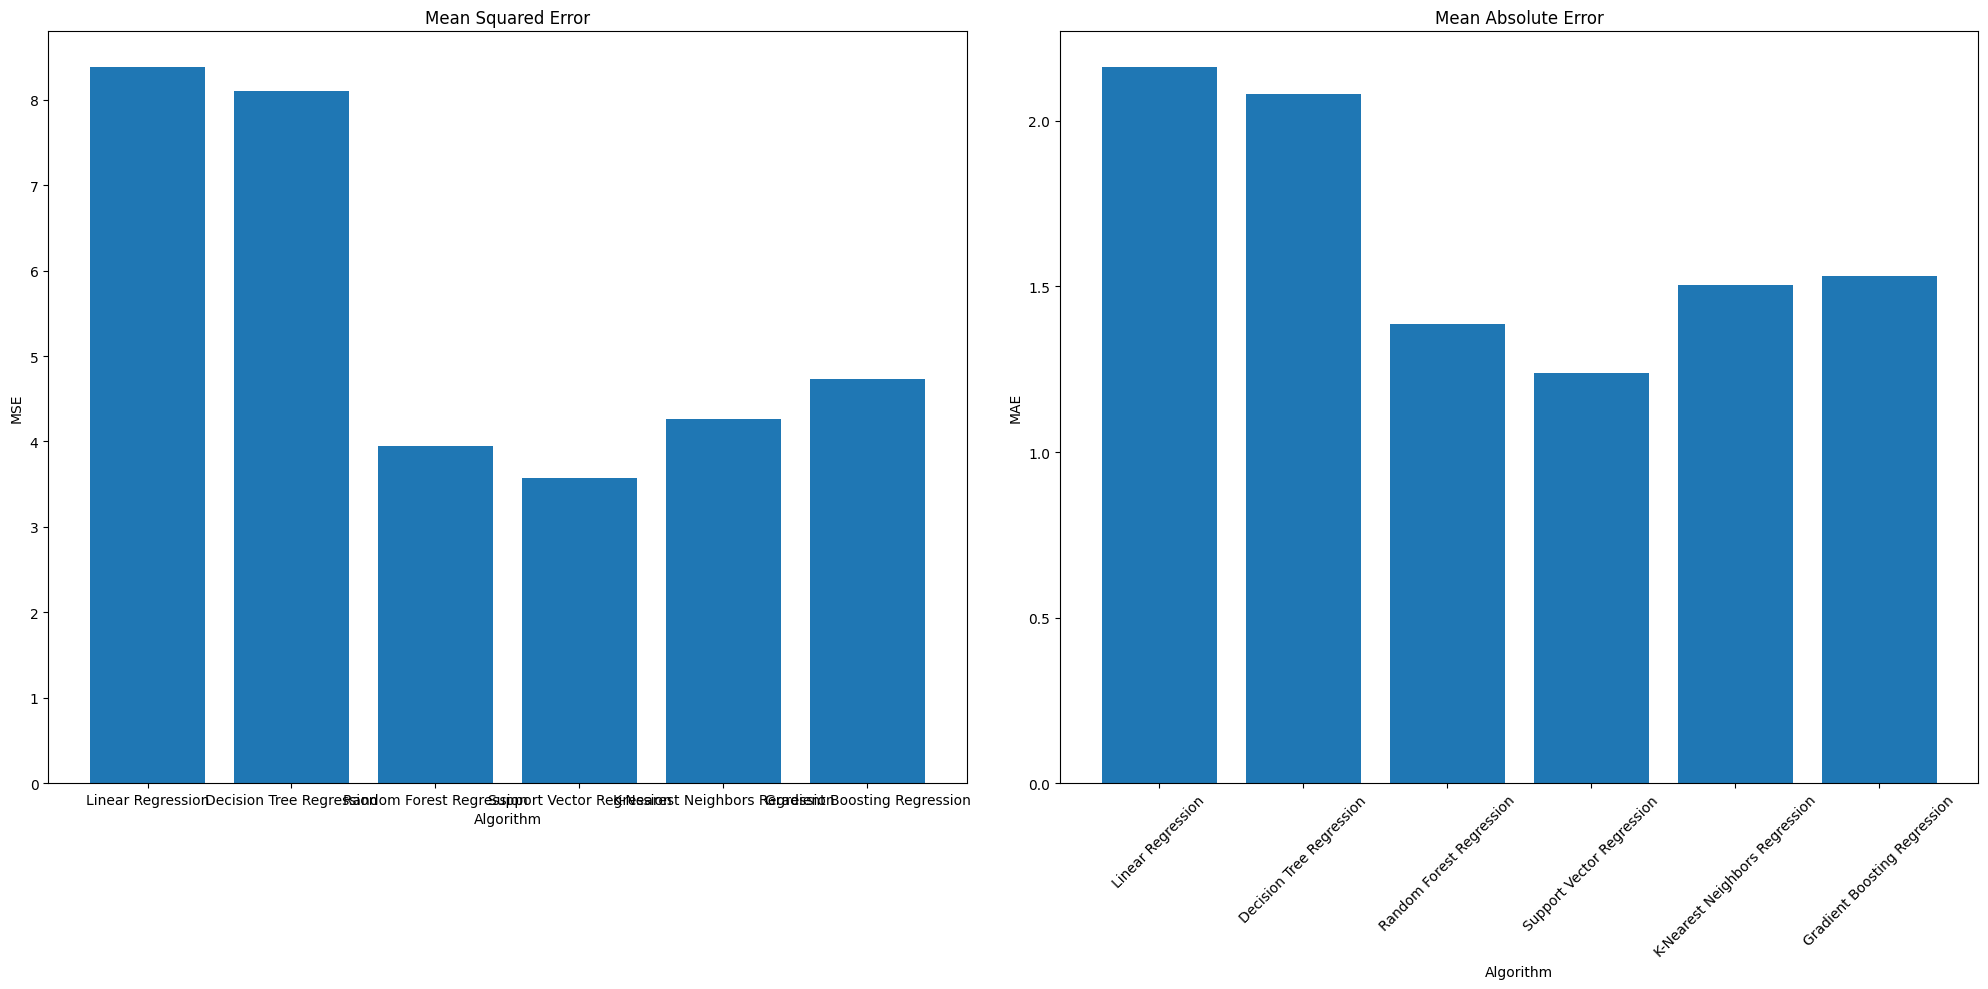

The best performing regression algorithm is: Support Vector Regression


In [ ]:
# Assuming you have your training and testing data in separate variables X_train, y_train, X_test, y_test

best_algorithm = perform_regression_analysis(X_train, y_train, X_test, y_test)
print(f"The best performing regression algorithm is: {best_algorithm}")


In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

def evaluate_regression_algorithms(X_train, y_train, X_test, y_test):
    algorithms = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Random Forest Regression': RandomForestRegressor(),
        'Support Vector Regression': SVR(),
        'K-Nearest Neighbors Regression': KNeighborsRegressor(),
        'Gradient Boosting Regression': GradientBoostingRegressor()
    }

    metrics = {}

    for alg_name, algorithm in algorithms.items():
        algorithm.fit(X_train, y_train)
        predictions = algorithm.predict(X_test)
        metrics[alg_name] = {
            'MSE': mean_squared_error(y_test, predictions),
            'MAE': mean_absolute_error(y_test, predictions)
        }

    return metrics


In [ ]:
metrics = evaluate_regression_algorithms(X_train, y_train, X_test, y_test)

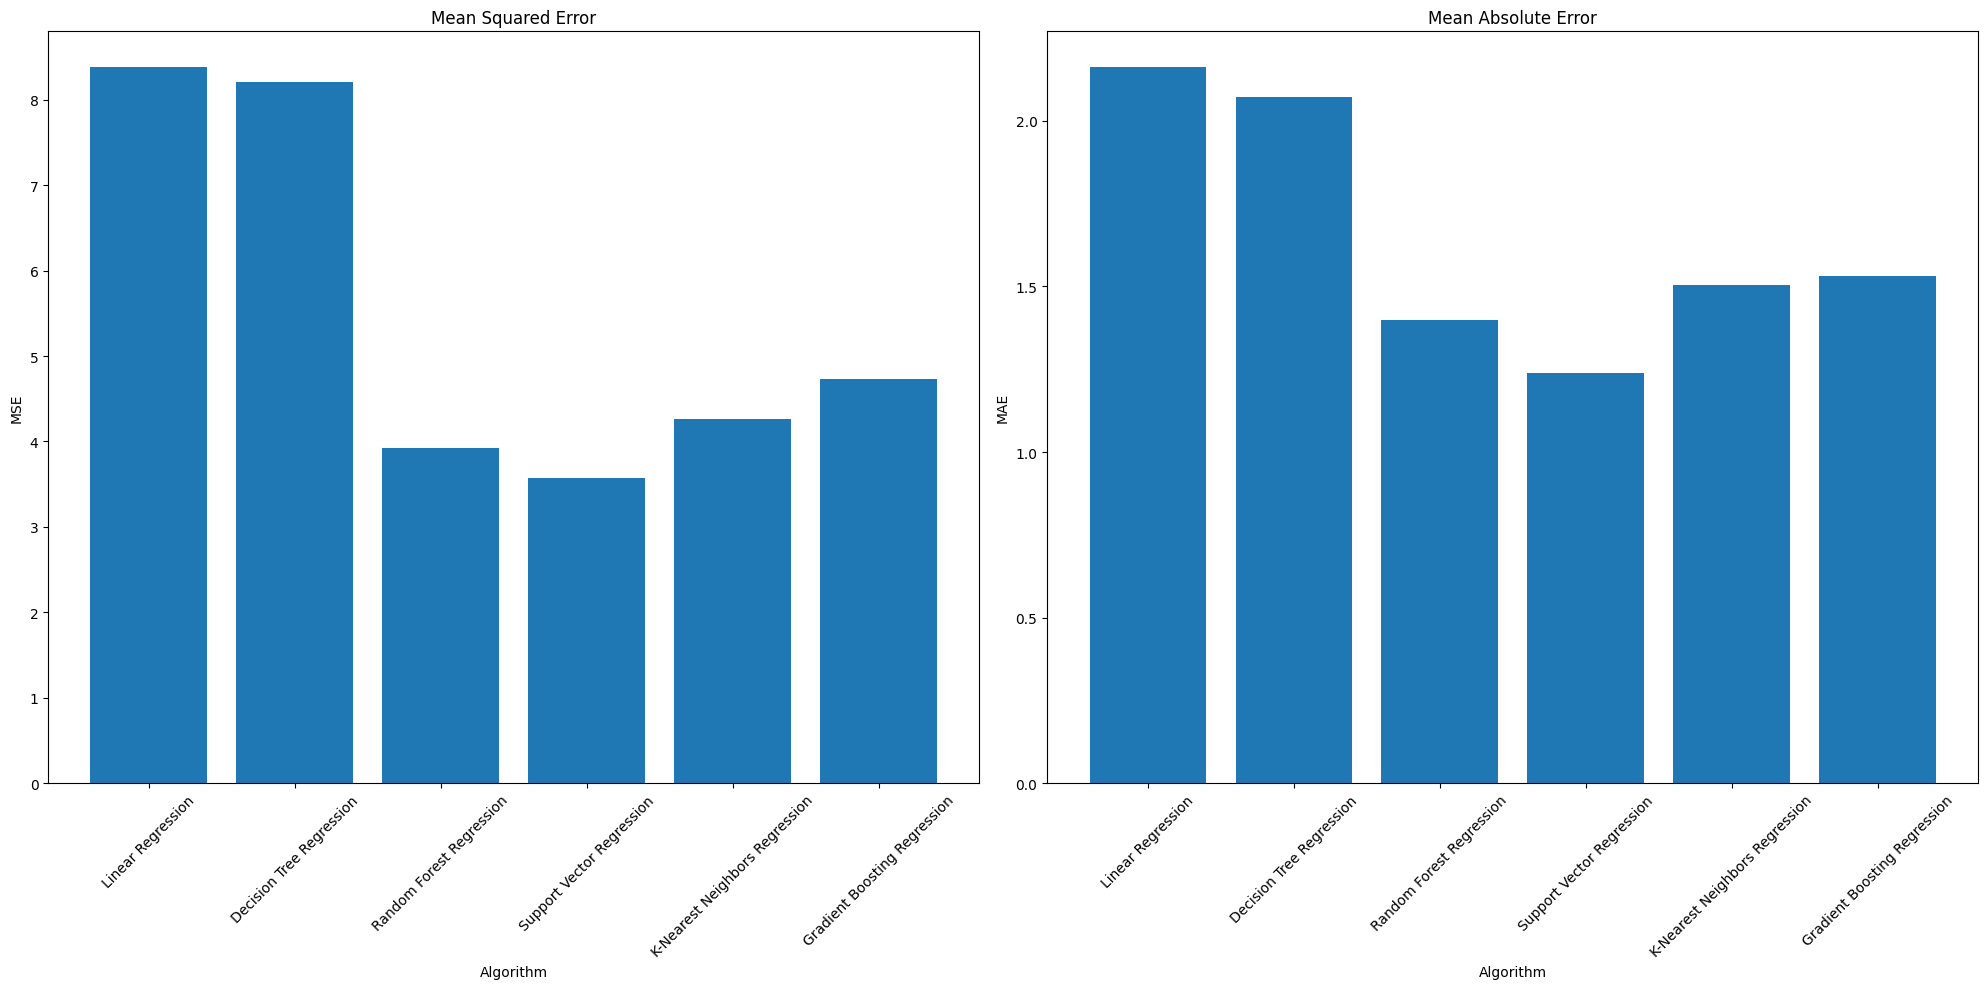

The best performing regression algorithm is: Support Vector Regression


In [ ]:
best_algorithm = perform_regression_analysis(X_train, y_train, X_test, y_test)
print(f"The best performing regression algorithm is: {best_algorithm}")


In [ ]:
# let's train the support vector regression and save the model
model =  SVR()
model.fit(X_train, y_train)


SVR()

In [ ]:
import pickle
filename = './finalized_SVR.sav'
pickle.dump(model, open(filename, 'wb'))

In [79]:
feature = list(selected_components_df.columns)

In [83]:
feature

['PC1_height',
 'PC2_weight',
 'PC3_potential',
 'PC4_crossing',
 'PC5_finishing',
 'PC6_heading_accuracy',
 'PC7_short_passing',
 'PC8_volleys',
 'PC9_dribbling',
 'PC10_curve',
 'PC11_free_kick_accuracy']

In [82]:
[f.split('_')[1] for f in feature ]

['height',
 'weight',
 'potential',
 'crossing',
 'finishing',
 'heading',
 'short',
 'volleys',
 'dribbling',
 'curve',
 'free']